In [1]:
%matplotlib inline

In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pylab as plt
import imp
import csv
import pandas as pd
from io import StringIO

In [3]:
Time = np.arange(1900,2100)
print(len(Time))


200


In [4]:
# AISM_VUB = AISM_VUB
# Region R5

fname = "../Experiments/AISM_VUB_BM02_R5.dat" # File to read
with open(fname) as f:
    AISM_VUB_BM02_R5 = np.array([float(row) for row in f])

fname = "../Experiments/AISM_VUB_BM04_R5.dat" # File to read
with open(fname) as f:
    AISM_VUB_BM04_R5 = np.array([float(row) for row in f])

fname = "../Experiments/AISM_VUB_BM08_R5.dat" # File to read
with open(fname) as f:
    AISM_VUB_BM08_R5 = np.array([float(row) for row in f])

# Find best scaling
err_min = 1000
sc_opt = 0.0
for sc in np.arange(-0.99,2,0.01):
    SF_AISM_VUB_BM08_R5 = sc
    AISM_VUB_BM02_R5_scaled = AISM_VUB_BM08_R5 * (2/8)**(1+SF_AISM_VUB_BM08_R5)
    AISM_VUB_BM04_R5_scaled = AISM_VUB_BM08_R5 * (4/8)**(1+SF_AISM_VUB_BM08_R5)
    AISM_VUB_BM08_R5_scaled = AISM_VUB_BM08_R5 * (8/8)**(1+SF_AISM_VUB_BM08_R5)
    
    # compute error
    err04 = sum((AISM_VUB_BM04_R5_scaled[:100]-AISM_VUB_BM04_R5[:100])**2)
    err = err04 
    if err < err_min:
        sc_opt = sc
        err_min = err

print("Optimal scaling: ", np.round(sc_opt,3))

SF_AISM_VUB_BM08_R5 = 0.0
AISM_VUB_BM02_R5_scaled1 = AISM_VUB_BM08_R5 * (2/8)**(1+SF_AISM_VUB_BM08_R5)
AISM_VUB_BM04_R5_scaled1 = AISM_VUB_BM08_R5 * (4/8)**(1+SF_AISM_VUB_BM08_R5)
AISM_VUB_BM08_R5_scaled1 = AISM_VUB_BM08_R5 * (8/8)**(1+SF_AISM_VUB_BM08_R5)


SF_AISM_VUB_BM08_R5 = sc_opt
AISM_VUB_BM02_R5_scaled = AISM_VUB_BM08_R5 * (2/8)**(1+SF_AISM_VUB_BM08_R5)
AISM_VUB_BM04_R5_scaled = AISM_VUB_BM08_R5 * (4/8)**(1+SF_AISM_VUB_BM08_R5)
AISM_VUB_BM08_R5_scaled = AISM_VUB_BM08_R5 * (8/8)**(1+SF_AISM_VUB_BM08_R5)



Optimal scaling:  0.4


In [5]:
# Read data
# BISI_LBL


fname = "../Experiments/BISI_LBL_BM08_R5.dat" # File to read
with open(fname) as f:
    BISI_LBL_BM08_500M_R5 = np.array([float(row) for row in f])

fname = "../Experiments/BISI_LBL_1KM_BM02_R5.dat" # File to read
with open(fname) as f:
    BISI_LBL_BM02_R5 = np.array([float(row) for row in f])

fname = "../Experiments/BISI_LBL_1KM_BM04_R5.dat" # File to read
with open(fname) as f:
    BISI_LBL_BM04_R5 = np.array([float(row) for row in f])

fname = "../Experiments/BISI_LBL_1KM_BM08_R5.dat" # File to read
with open(fname) as f:
    BISI_LBL_BM08_R5 = np.array([float(row) for row in f])

fname = "../Experiments/BISI_LBL_1KM_BM16_R5.dat" # File to read
with open(fname) as f:
    BISI_LBL_BM16_R5 = np.array([float(row) for row in f])

# Find best scaling
err_min = 1000
sc_opt = 0.0
for sc in np.arange(-0.99,2,0.01):
    SF_BISI_LBL_BM08_R5 = sc
    BISI_LBL_BM01_R5_scaled = BISI_LBL_BM08_R5 * (1/8)**(1+SF_BISI_LBL_BM08_R5)
    BISI_LBL_BM02_R5_scaled = BISI_LBL_BM08_R5 * (2/8)**(1+SF_BISI_LBL_BM08_R5)
    BISI_LBL_BM04_R5_scaled = BISI_LBL_BM08_R5 * (4/8)**(1+SF_BISI_LBL_BM08_R5)
    BISI_LBL_BM08_R5_scaled = BISI_LBL_BM08_R5 * (8/8)**(1+SF_BISI_LBL_BM08_R5)
    BISI_LBL_BM16_R5_scaled = BISI_LBL_BM08_R5 * (16/8)**(1+SF_BISI_LBL_BM08_R5)
    BISI_LBL_BM32_R5_scaled = BISI_LBL_BM08_R5 * (32/8)**(1+SF_BISI_LBL_BM08_R5)
    
    # compute error
    err04 = sum((BISI_LBL_BM04_R5_scaled[:100]-BISI_LBL_BM04_R5[:100])**2)
    erR56 = np.sum((BISI_LBL_BM16_R5_scaled[:100]-BISI_LBL_BM16_R5[:100])**2)
    err = err04 + erR56
    if err < err_min:
        sc_opt = sc
        err_min = err

print("Optimal scaling: ", np.round(sc_opt,3))

SF_BISI_LBL_BM08_R5 = 0.0
BISI_LBL_BM01_R5_scaled1 = BISI_LBL_BM08_R5 * (1/8)**(1+SF_BISI_LBL_BM08_R5)
BISI_LBL_BM02_R5_scaled1 = BISI_LBL_BM08_R5 * (2/8)**(1+SF_BISI_LBL_BM08_R5)
BISI_LBL_BM04_R5_scaled1 = BISI_LBL_BM08_R5 * (4/8)**(1+SF_BISI_LBL_BM08_R5)
BISI_LBL_BM08_R5_scaled1 = BISI_LBL_BM08_R5 * (8/8)**(1+SF_BISI_LBL_BM08_R5)
BISI_LBL_BM16_R5_scaled1 = BISI_LBL_BM08_R5 * (16/8)**(1+SF_BISI_LBL_BM08_R5)
BISI_LBL_BM32_R5_scaled1 = BISI_LBL_BM08_R5 * (32/8)**(1+SF_BISI_LBL_BM08_R5)


SF_BISI_LBL_BM08_R5 = sc_opt
BISI_LBL_BM01_R5_scaled = BISI_LBL_BM08_R5 * (1/8)**(1+SF_BISI_LBL_BM08_R5)
BISI_LBL_BM02_R5_scaled = BISI_LBL_BM08_R5 * (2/8)**(1+SF_BISI_LBL_BM08_R5)
BISI_LBL_BM04_R5_scaled = BISI_LBL_BM08_R5 * (4/8)**(1+SF_BISI_LBL_BM08_R5)
BISI_LBL_BM08_R5_scaled = BISI_LBL_BM08_R5 * (8/8)**(1+SF_BISI_LBL_BM08_R5)
BISI_LBL_BM16_R5_scaled = BISI_LBL_BM08_R5 * (16/8)**(1+SF_BISI_LBL_BM08_R5)
BISI_LBL_BM32_R5_scaled = BISI_LBL_BM08_R5 * (32/8)**(1+SF_BISI_LBL_BM08_R5)



Optimal scaling:  -0.55


In [6]:
# Read data
# CISM_NCA

# CISM_NCA = CISM_NCA
# Region R5

fname = "../Experiments/CISM_NCA_BM01_R5.dat" # File to read
with open(fname) as f:
    CISM_NCA_BM01_R5 = np.array([float(row) for row in f])

fname = "../Experiments/CISM_NCA_BM02_R5.dat" # File to read
with open(fname) as f:
    CISM_NCA_BM02_R5 = np.array([float(row) for row in f])

fname = "../Experiments/CISM_NCA_BM04_R5.dat" # File to read
with open(fname) as f:
    CISM_NCA_BM04_R5 = np.array([float(row) for row in f])

fname = "../Experiments/CISM_NCA_BM08_R5.dat" # File to read
with open(fname) as f:
    CISM_NCA_BM08_R5 = np.array([float(row) for row in f])

fname = "../Experiments/CISM_NCA_BM16_R5.dat" # File to read
with open(fname) as f:
    CISM_NCA_BM16_R5 = np.array([float(row) for row in f])

fname = "../Experiments/CISM_NCA_BM32_R5.dat" # File to read
with open(fname) as f:
    CISM_NCA_BM32_R5 = np.array([float(row) for row in f])

# Find best scaling
err_min = 1000
sc_opt = 0.0
for sc in np.arange(-0.99,2,0.01):
    SF_CISM_NCA_BM08_R5 = sc
    CISM_NCA_BM01_R5_scaled = CISM_NCA_BM08_R5 * (1/8)**(1+SF_CISM_NCA_BM08_R5)
    CISM_NCA_BM02_R5_scaled = CISM_NCA_BM08_R5 * (2/8)**(1+SF_CISM_NCA_BM08_R5)
    CISM_NCA_BM04_R5_scaled = CISM_NCA_BM08_R5 * (4/8)**(1+SF_CISM_NCA_BM08_R5)
    CISM_NCA_BM08_R5_scaled = CISM_NCA_BM08_R5 * (8/8)**(1+SF_CISM_NCA_BM08_R5)
    CISM_NCA_BM16_R5_scaled = CISM_NCA_BM08_R5 * (16/8)**(1+SF_CISM_NCA_BM08_R5)
    CISM_NCA_BM32_R5_scaled = CISM_NCA_BM08_R5 * (32/8)**(1+SF_CISM_NCA_BM08_R5)
    
    # compute error
    err04 = sum((CISM_NCA_BM04_R5_scaled[:100]-CISM_NCA_BM04_R5[:100])**2)
    err16 = np.sum((CISM_NCA_BM16_R5_scaled[:100]-CISM_NCA_BM16_R5[:100])**2)
    err = err04 + err16
    if err < err_min:
        sc_opt = sc
        err_min = err

print("Optimal scaling: ", np.round(sc_opt,3))

SF_CISM_NCA_BM08_R5 = 0.0
CISM_NCA_BM01_R5_scaled1 = CISM_NCA_BM08_R5 * (1/8)**(1+SF_CISM_NCA_BM08_R5)
CISM_NCA_BM02_R5_scaled1 = CISM_NCA_BM08_R5 * (2/8)**(1+SF_CISM_NCA_BM08_R5)
CISM_NCA_BM04_R5_scaled1 = CISM_NCA_BM08_R5 * (4/8)**(1+SF_CISM_NCA_BM08_R5)
CISM_NCA_BM08_R5_scaled1 = CISM_NCA_BM08_R5 * (8/8)**(1+SF_CISM_NCA_BM08_R5)
CISM_NCA_BM16_R5_scaled1 = CISM_NCA_BM08_R5 * (16/8)**(1+SF_CISM_NCA_BM08_R5)
CISM_NCA_BM32_R5_scaled1 = CISM_NCA_BM08_R5 * (32/8)**(1+SF_CISM_NCA_BM08_R5)


SF_CISM_NCA_BM08_R5 = sc_opt
CISM_NCA_BM01_R5_scaled = CISM_NCA_BM08_R5 * (1/8)**(1+SF_CISM_NCA_BM08_R5)
CISM_NCA_BM02_R5_scaled = CISM_NCA_BM08_R5 * (2/8)**(1+SF_CISM_NCA_BM08_R5)
CISM_NCA_BM04_R5_scaled = CISM_NCA_BM08_R5 * (4/8)**(1+SF_CISM_NCA_BM08_R5)
CISM_NCA_BM08_R5_scaled = CISM_NCA_BM08_R5 * (8/8)**(1+SF_CISM_NCA_BM08_R5)
CISM_NCA_BM16_R5_scaled = CISM_NCA_BM08_R5 * (16/8)**(1+SF_CISM_NCA_BM08_R5)
CISM_NCA_BM32_R5_scaled = CISM_NCA_BM08_R5 * (32/8)**(1+SF_CISM_NCA_BM08_R5)



Optimal scaling:  -0.63


In [7]:
# FETI_VUB = FETI_VUB
# Region R5

fname = "../Experiments/FETI_VUB_BM01_R5.dat" # File to read
with open(fname) as f:
    FETI_VUB_BM01_R5 = np.array([float(row) for row in f])

fname = "../Experiments/FETI_VUB_BM02_R5.dat" # File to read
with open(fname) as f:
    FETI_VUB_BM02_R5 = np.array([float(row) for row in f])

fname = "../Experiments/FETI_VUB_BM04_R5.dat" # File to read
with open(fname) as f:
    FETI_VUB_BM04_R5 = np.array([float(row) for row in f])

fname = "../Experiments/FETI_VUB_BM08_R5.dat" # File to read
with open(fname) as f:
    FETI_VUB_BM08_R5 = np.array([float(row) for row in f])

fname = "../Experiments/FETI_VUB_BM16_R5.dat" # File to read
with open(fname) as f:
    FETI_VUB_BM16_R5 = np.array([float(row) for row in f])

fname = "../Experiments/FETI_VUB_BM32_R5.dat" # File to read
with open(fname) as f:
    FETI_VUB_BM32_R5 = np.array([float(row) for row in f])

# Find best scaling
err_min = 1000
sc_opt = 0.0
for sc in np.arange(-0.99,2,0.01):
    SF_FETI_VUB_BM08_R5 = sc
    FETI_VUB_BM01_R5_scaled = FETI_VUB_BM08_R5 * (1/8)**(1+SF_FETI_VUB_BM08_R5)
    FETI_VUB_BM02_R5_scaled = FETI_VUB_BM08_R5 * (2/8)**(1+SF_FETI_VUB_BM08_R5)
    FETI_VUB_BM04_R5_scaled = FETI_VUB_BM08_R5 * (4/8)**(1+SF_FETI_VUB_BM08_R5)
    FETI_VUB_BM08_R5_scaled = FETI_VUB_BM08_R5 * (8/8)**(1+SF_FETI_VUB_BM08_R5)
    FETI_VUB_BM16_R5_scaled = FETI_VUB_BM08_R5 * (16/8)**(1+SF_FETI_VUB_BM08_R5)
    FETI_VUB_BM32_R5_scaled = FETI_VUB_BM08_R5 * (32/8)**(1+SF_FETI_VUB_BM08_R5)
    
    # compute error
    err04 = sum((FETI_VUB_BM04_R5_scaled[:100]-FETI_VUB_BM04_R5[:100])**2)
    err16 = np.sum((FETI_VUB_BM16_R5_scaled[:100]-FETI_VUB_BM16_R5[:100])**2)
    err = err04 + err16
    if err < err_min:
        sc_opt = sc
        err_min = err

print("Optimal scaling: ", np.round(sc_opt,3))

SF_FETI_VUB_BM08_R5 = 0.0
FETI_VUB_BM01_R5_scaled1 = FETI_VUB_BM08_R5 * (1/8)**(1+SF_FETI_VUB_BM08_R5)
FETI_VUB_BM02_R5_scaled1 = FETI_VUB_BM08_R5 * (2/8)**(1+SF_FETI_VUB_BM08_R5)
FETI_VUB_BM04_R5_scaled1 = FETI_VUB_BM08_R5 * (4/8)**(1+SF_FETI_VUB_BM08_R5)
FETI_VUB_BM08_R5_scaled1 = FETI_VUB_BM08_R5 * (8/8)**(1+SF_FETI_VUB_BM08_R5)
FETI_VUB_BM16_R5_scaled1 = FETI_VUB_BM08_R5 * (16/8)**(1+SF_FETI_VUB_BM08_R5)
FETI_VUB_BM32_R5_scaled1 = FETI_VUB_BM08_R5 * (32/8)**(1+SF_FETI_VUB_BM08_R5)


SF_FETI_VUB_BM08_R5 = sc_opt
FETI_VUB_BM01_R5_scaled = FETI_VUB_BM08_R5 * (1/8)**(1+SF_FETI_VUB_BM08_R5)
FETI_VUB_BM02_R5_scaled = FETI_VUB_BM08_R5 * (2/8)**(1+SF_FETI_VUB_BM08_R5)
FETI_VUB_BM04_R5_scaled = FETI_VUB_BM08_R5 * (4/8)**(1+SF_FETI_VUB_BM08_R5)
FETI_VUB_BM08_R5_scaled = FETI_VUB_BM08_R5 * (8/8)**(1+SF_FETI_VUB_BM08_R5)
FETI_VUB_BM16_R5_scaled = FETI_VUB_BM08_R5 * (16/8)**(1+SF_FETI_VUB_BM08_R5)
FETI_VUB_BM32_R5_scaled = FETI_VUB_BM08_R5 * (32/8)**(1+SF_FETI_VUB_BM08_R5)

    


Optimal scaling:  -0.99


In [8]:
# Read data
# GRIS_LSC

fname = "../Experiments/GRIS_LSC_BM01_R5.dat" # File to read
with open(fname) as f:
    GRIS_LSC_BM01_R5 = np.array([float(row) for row in f])

fname = "../Experiments/GRIS_LSC_BM02_R5.dat" # File to read
with open(fname) as f:
    GRIS_LSC_BM02_R5 = np.array([float(row) for row in f])

fname = "../Experiments/GRIS_LSC_BM04_R5.dat" # File to read
with open(fname) as f:
    GRIS_LSC_BM04_R5 = np.array([float(row) for row in f])

fname = "../Experiments/GRIS_LSC_BM08_R5.dat" # File to read
with open(fname) as f:
    GRIS_LSC_BM08_R5 = np.array([float(row) for row in f])

fname = "../Experiments/GRIS_LSC_BM16_R5.dat" # File to read
with open(fname) as f:
    GRIS_LSC_BM16_R5 = np.array([float(row) for row in f])

fname = "../Experiments/GRIS_LSC_BM32_R5.dat" # File to read
with open(fname) as f:
    GRIS_LSC_BM32_R5 = np.array([float(row) for row in f])

# Find best scaling
err_min = 1000
sc_opt = 0.0
for sc in np.arange(-0.99,2,0.01):
    SF_GRIS_LSC_BM08_R5 = sc
    GRIS_LSC_BM01_R5_scaled = GRIS_LSC_BM08_R5 * (1/8)**(1+SF_GRIS_LSC_BM08_R5)
    GRIS_LSC_BM02_R5_scaled = GRIS_LSC_BM08_R5 * (2/8)**(1+SF_GRIS_LSC_BM08_R5)
    GRIS_LSC_BM04_R5_scaled = GRIS_LSC_BM08_R5 * (4/8)**(1+SF_GRIS_LSC_BM08_R5)
    GRIS_LSC_BM08_R5_scaled = GRIS_LSC_BM08_R5 * (8/8)**(1+SF_GRIS_LSC_BM08_R5)
    GRIS_LSC_BM16_R5_scaled = GRIS_LSC_BM08_R5 * (16/8)**(1+SF_GRIS_LSC_BM08_R5)
    GRIS_LSC_BM32_R5_scaled = GRIS_LSC_BM08_R5 * (32/8)**(1+SF_GRIS_LSC_BM08_R5)
    
    # compute error
    err04 = sum((GRIS_LSC_BM04_R5_scaled[:100]-GRIS_LSC_BM04_R5[:100])**2)
    err16 = np.sum((GRIS_LSC_BM16_R5_scaled[:100]-GRIS_LSC_BM16_R5[:100])**2)
    err = err04 + err16
    if err < err_min:
        sc_opt = sc
        err_min = err

print("Optimal scaling: ", np.round(sc_opt,3))

SF_GRIS_LSC_BM08_R5 = 0.0
GRIS_LSC_BM01_R5_scaled1 = GRIS_LSC_BM08_R5 * (1/8)**(1+SF_GRIS_LSC_BM08_R5)
GRIS_LSC_BM02_R5_scaled1 = GRIS_LSC_BM08_R5 * (2/8)**(1+SF_GRIS_LSC_BM08_R5)
GRIS_LSC_BM04_R5_scaled1 = GRIS_LSC_BM08_R5 * (4/8)**(1+SF_GRIS_LSC_BM08_R5)
GRIS_LSC_BM08_R5_scaled1 = GRIS_LSC_BM08_R5 * (8/8)**(1+SF_GRIS_LSC_BM08_R5)
GRIS_LSC_BM16_R5_scaled1 = GRIS_LSC_BM08_R5 * (16/8)**(1+SF_GRIS_LSC_BM08_R5)
GRIS_LSC_BM32_R5_scaled1 = GRIS_LSC_BM08_R5 * (32/8)**(1+SF_GRIS_LSC_BM08_R5)


SF_GRIS_LSC_BM08_R5 = sc_opt
GRIS_LSC_BM01_R5_scaled = GRIS_LSC_BM08_R5 * (1/8)**(1+SF_GRIS_LSC_BM08_R5)
GRIS_LSC_BM02_R5_scaled = GRIS_LSC_BM08_R5 * (2/8)**(1+SF_GRIS_LSC_BM08_R5)
GRIS_LSC_BM04_R5_scaled = GRIS_LSC_BM08_R5 * (4/8)**(1+SF_GRIS_LSC_BM08_R5)
GRIS_LSC_BM08_R5_scaled = GRIS_LSC_BM08_R5 * (8/8)**(1+SF_GRIS_LSC_BM08_R5)
GRIS_LSC_BM16_R5_scaled = GRIS_LSC_BM08_R5 * (16/8)**(1+SF_GRIS_LSC_BM08_R5)
GRIS_LSC_BM32_R5_scaled = GRIS_LSC_BM08_R5 * (32/8)**(1+SF_GRIS_LSC_BM08_R5)

    

Optimal scaling:  -0.63


In [9]:
# Read data
# IMAU_VUB

fname = "../Experiments/IMAU_VUB_BM01_R5.dat" # File to read
with open(fname) as f:
    IMAU_VUB_BM01_R5 = np.array([float(row) for row in f])

fname = "../Experiments/IMAU_VUB_BM02_R5.dat" # File to read
with open(fname) as f:
    IMAU_VUB_BM02_R5 = np.array([float(row) for row in f])

fname = "../Experiments/IMAU_VUB_BM04_R5.dat" # File to read
with open(fname) as f:
    IMAU_VUB_BM04_R5 = np.array([float(row) for row in f])

fname = "../Experiments/IMAU_VUB_BM08_R5.dat" # File to read
with open(fname) as f:
    IMAU_VUB_BM08_R5 = np.array([float(row) for row in f])

fname = "../Experiments/IMAU_VUB_BM16_R5.dat" # File to read
with open(fname) as f:
    IMAU_VUB_BM16_R5 = np.array([float(row) for row in f])

fname = "../Experiments/IMAU_VUB_BM32_R5.dat" # File to read
with open(fname) as f:
    IMAU_VUB_BM32_R5 = np.array([float(row) for row in f])

# Find best scaling
err_min = 1000
sc_opt = 0.0
for sc in np.arange(-0.99,2,0.01):
    SF_IMAU_VUB_BM08_R5 = sc
    IMAU_VUB_BM01_R5_scaled = IMAU_VUB_BM08_R5 * (1/8)**(1+SF_IMAU_VUB_BM08_R5)
    IMAU_VUB_BM02_R5_scaled = IMAU_VUB_BM08_R5 * (2/8)**(1+SF_IMAU_VUB_BM08_R5)
    IMAU_VUB_BM04_R5_scaled = IMAU_VUB_BM08_R5 * (4/8)**(1+SF_IMAU_VUB_BM08_R5)
    IMAU_VUB_BM08_R5_scaled = IMAU_VUB_BM08_R5 * (8/8)**(1+SF_IMAU_VUB_BM08_R5)
    IMAU_VUB_BM16_R5_scaled = IMAU_VUB_BM08_R5 * (16/8)**(1+SF_IMAU_VUB_BM08_R5)
    IMAU_VUB_BM32_R5_scaled = IMAU_VUB_BM08_R5 * (32/8)**(1+SF_IMAU_VUB_BM08_R5)
    
    # compute error
    err04 = sum((IMAU_VUB_BM04_R5_scaled[:100]-IMAU_VUB_BM04_R5[:100])**2)
    err16 = np.sum((IMAU_VUB_BM16_R5_scaled[:100]-IMAU_VUB_BM16_R5[:100])**2)
    err = err04 + err16
    if err < err_min:
        sc_opt = sc
        err_min = err

print("Optimal scaling: ", np.round(sc_opt,3))

SF_IMAU_VUB_BM08_R5 = 0.0
IMAU_VUB_BM01_R5_scaled1 = IMAU_VUB_BM08_R5 * (1/8)**(1+SF_IMAU_VUB_BM08_R5)
IMAU_VUB_BM02_R5_scaled1 = IMAU_VUB_BM08_R5 * (2/8)**(1+SF_IMAU_VUB_BM08_R5)
IMAU_VUB_BM04_R5_scaled1 = IMAU_VUB_BM08_R5 * (4/8)**(1+SF_IMAU_VUB_BM08_R5)
IMAU_VUB_BM08_R5_scaled1 = IMAU_VUB_BM08_R5 * (8/8)**(1+SF_IMAU_VUB_BM08_R5)
IMAU_VUB_BM16_R5_scaled1 = IMAU_VUB_BM08_R5 * (16/8)**(1+SF_IMAU_VUB_BM08_R5)
IMAU_VUB_BM32_R5_scaled1 = IMAU_VUB_BM08_R5 * (32/8)**(1+SF_IMAU_VUB_BM08_R5)


SF_IMAU_VUB_BM08_R5 = sc_opt
IMAU_VUB_BM01_R5_scaled = IMAU_VUB_BM08_R5 * (1/8)**(1+SF_IMAU_VUB_BM08_R5)
IMAU_VUB_BM02_R5_scaled = IMAU_VUB_BM08_R5 * (2/8)**(1+SF_IMAU_VUB_BM08_R5)
IMAU_VUB_BM04_R5_scaled = IMAU_VUB_BM08_R5 * (4/8)**(1+SF_IMAU_VUB_BM08_R5)
IMAU_VUB_BM08_R5_scaled = IMAU_VUB_BM08_R5 * (8/8)**(1+SF_IMAU_VUB_BM08_R5)
IMAU_VUB_BM16_R5_scaled = IMAU_VUB_BM08_R5 * (16/8)**(1+SF_IMAU_VUB_BM08_R5)
IMAU_VUB_BM32_R5_scaled = IMAU_VUB_BM08_R5 * (32/8)**(1+SF_IMAU_VUB_BM08_R5)



Optimal scaling:  -0.99


In [10]:
# Read data
# ISSM_JPL

fname = "../Experiments/ISSM_JPL_BM01_R5.dat" # File to read
with open(fname) as f:
    ISSM_JPL_BM01_R5 = np.array([float(row) for row in f])

fname = "../Experiments/ISSM_JPL_BM02_R5.dat" # File to read
with open(fname) as f:
    ISSM_JPL_BM02_R5 = np.array([float(row) for row in f])

fname = "../Experiments/ISSM_JPL_BM04_R5.dat" # File to read
with open(fname) as f:
    ISSM_JPL_BM04_R5 = np.array([float(row) for row in f])

fname = "../Experiments/ISSM_JPL_BM08_R5.dat" # File to read
with open(fname) as f:
    ISSM_JPL_BM08_R5 = np.array([float(row) for row in f])

fname = "../Experiments/ISSM_JPL_BM16_R5.dat" # File to read
with open(fname) as f:
    ISSM_JPL_BM16_R5 = np.array([float(row) for row in f])

fname = "../Experiments/ISSM_JPL_BM32_R5.dat" # File to read
with open(fname) as f:
    ISSM_JPL_BM32_R5 = np.array([float(row) for row in f])

# Find best scaling
err_min = 1000
sc_opt = 0.0
for sc in np.arange(-0.99,2,0.01):
    SF_ISSM_JPL_BM08_R5 = sc
    ISSM_JPL_BM01_R5_scaled = ISSM_JPL_BM08_R5 * (1/8)**(1+SF_ISSM_JPL_BM08_R5)
    ISSM_JPL_BM02_R5_scaled = ISSM_JPL_BM08_R5 * (2/8)**(1+SF_ISSM_JPL_BM08_R5)
    ISSM_JPL_BM04_R5_scaled = ISSM_JPL_BM08_R5 * (4/8)**(1+SF_ISSM_JPL_BM08_R5)
    ISSM_JPL_BM08_R5_scaled = ISSM_JPL_BM08_R5 * (8/8)**(1+SF_ISSM_JPL_BM08_R5)
    ISSM_JPL_BM16_R5_scaled = ISSM_JPL_BM08_R5 * (16/8)**(1+SF_ISSM_JPL_BM08_R5)
    ISSM_JPL_BM32_R5_scaled = ISSM_JPL_BM08_R5 * (32/8)**(1+SF_ISSM_JPL_BM08_R5)
    
    # compute error
    err04 = sum((ISSM_JPL_BM04_R5_scaled[:100]-ISSM_JPL_BM04_R5[:100])**2)
    err16 = np.sum((ISSM_JPL_BM16_R5_scaled[:100]-ISSM_JPL_BM16_R5[:100])**2)
    err = err04 + err16
    if err < err_min:
        sc_opt = sc
        err_min = err

print("Optimal scaling: ", np.round(sc_opt,3))

SF_ISSM_JPL_BM08_R5 = 0.0
ISSM_JPL_BM01_R5_scaled1 = ISSM_JPL_BM08_R5 * (1/8)**(1+SF_ISSM_JPL_BM08_R5)
ISSM_JPL_BM02_R5_scaled1 = ISSM_JPL_BM08_R5 * (2/8)**(1+SF_ISSM_JPL_BM08_R5)
ISSM_JPL_BM04_R5_scaled1 = ISSM_JPL_BM08_R5 * (4/8)**(1+SF_ISSM_JPL_BM08_R5)
ISSM_JPL_BM08_R5_scaled1 = ISSM_JPL_BM08_R5 * (8/8)**(1+SF_ISSM_JPL_BM08_R5)
ISSM_JPL_BM16_R5_scaled1 = ISSM_JPL_BM08_R5 * (16/8)**(1+SF_ISSM_JPL_BM08_R5)
ISSM_JPL_BM32_R5_scaled1 = ISSM_JPL_BM08_R5 * (32/8)**(1+SF_ISSM_JPL_BM08_R5)


SF_ISSM_JPL_BM08_R5 = sc_opt
ISSM_JPL_BM01_R5_scaled = ISSM_JPL_BM08_R5 * (1/8)**(1+SF_ISSM_JPL_BM08_R5)
ISSM_JPL_BM02_R5_scaled = ISSM_JPL_BM08_R5 * (2/8)**(1+SF_ISSM_JPL_BM08_R5)
ISSM_JPL_BM04_R5_scaled = ISSM_JPL_BM08_R5 * (4/8)**(1+SF_ISSM_JPL_BM08_R5)
ISSM_JPL_BM08_R5_scaled = ISSM_JPL_BM08_R5 * (8/8)**(1+SF_ISSM_JPL_BM08_R5)
ISSM_JPL_BM16_R5_scaled = ISSM_JPL_BM08_R5 * (16/8)**(1+SF_ISSM_JPL_BM08_R5)
ISSM_JPL_BM32_R5_scaled = ISSM_JPL_BM08_R5 * (32/8)**(1+SF_ISSM_JPL_BM08_R5)



Optimal scaling:  -0.55


In [11]:
# Read data
# ISSM_UCI

fname = "../Experiments/ISSM_UCI_BM01_R5.dat" # File to read
with open(fname) as f:
    ISSM_UCI_BM01_R5 = np.array([float(row) for row in f])

fname = "../Experiments/ISSM_UCI_BM02_R5.dat" # File to read
with open(fname) as f:
    ISSM_UCI_BM02_R5 = np.array([float(row) for row in f])

fname = "../Experiments/ISSM_UCI_BM04_R5.dat" # File to read
with open(fname) as f:
    ISSM_UCI_BM04_R5 = np.array([float(row) for row in f])

fname = "../Experiments/ISSM_UCI_BM08_R5.dat" # File to read
with open(fname) as f:
    ISSM_UCI_BM08_R5 = np.array([float(row) for row in f])

fname = "../Experiments/ISSM_UCI_BM16_R5.dat" # File to read
with open(fname) as f:
    ISSM_UCI_BM16_R5 = np.array([float(row) for row in f])

fname = "../Experiments/ISSM_UCI_BM32_R5.dat" # File to read
with open(fname) as f:
    ISSM_UCI_BM32_R5 = np.array([float(row) for row in f])

# Find best scaling
err_min = 1000
sc_opt = 0.0
for sc in np.arange(-0.99,2,0.01):
    SF_ISSM_UCI_BM08_R5 = sc
    ISSM_UCI_BM01_R5_scaled = ISSM_UCI_BM08_R5 * (1/8)**(1+SF_ISSM_UCI_BM08_R5)
    ISSM_UCI_BM02_R5_scaled = ISSM_UCI_BM08_R5 * (2/8)**(1+SF_ISSM_UCI_BM08_R5)
    ISSM_UCI_BM04_R5_scaled = ISSM_UCI_BM08_R5 * (4/8)**(1+SF_ISSM_UCI_BM08_R5)
    ISSM_UCI_BM08_R5_scaled = ISSM_UCI_BM08_R5 * (8/8)**(1+SF_ISSM_UCI_BM08_R5)
    ISSM_UCI_BM16_R5_scaled = ISSM_UCI_BM08_R5 * (16/8)**(1+SF_ISSM_UCI_BM08_R5)
    ISSM_UCI_BM32_R5_scaled = ISSM_UCI_BM08_R5 * (32/8)**(1+SF_ISSM_UCI_BM08_R5)
    
    # compute error
    err04 = sum((ISSM_UCI_BM04_R5_scaled[:100]-ISSM_UCI_BM04_R5[:100])**2)
    err16 = np.sum((ISSM_UCI_BM16_R5_scaled[:100]-ISSM_UCI_BM16_R5[:100])**2)
    err = err04 + err16
    if err < err_min:
        sc_opt = sc
        err_min = err

print("Optimal scaling: ", np.round(sc_opt,3))

SF_ISSM_UCI_BM08_R5 = 0.0
ISSM_UCI_BM01_R5_scaled1 = ISSM_UCI_BM08_R5 * (1/8)**(1+SF_ISSM_UCI_BM08_R5)
ISSM_UCI_BM02_R5_scaled1 = ISSM_UCI_BM08_R5 * (2/8)**(1+SF_ISSM_UCI_BM08_R5)
ISSM_UCI_BM04_R5_scaled1 = ISSM_UCI_BM08_R5 * (4/8)**(1+SF_ISSM_UCI_BM08_R5)
ISSM_UCI_BM08_R5_scaled1 = ISSM_UCI_BM08_R5 * (8/8)**(1+SF_ISSM_UCI_BM08_R5)
ISSM_UCI_BM16_R5_scaled1 = ISSM_UCI_BM08_R5 * (16/8)**(1+SF_ISSM_UCI_BM08_R5)
ISSM_UCI_BM32_R5_scaled1 = ISSM_UCI_BM08_R5 * (32/8)**(1+SF_ISSM_UCI_BM08_R5)


SF_ISSM_UCI_BM08_R5 = sc_opt
ISSM_UCI_BM01_R5_scaled = ISSM_UCI_BM08_R5 * (1/8)**(1+SF_ISSM_UCI_BM08_R5)
ISSM_UCI_BM02_R5_scaled = ISSM_UCI_BM08_R5 * (2/8)**(1+SF_ISSM_UCI_BM08_R5)
ISSM_UCI_BM04_R5_scaled = ISSM_UCI_BM08_R5 * (4/8)**(1+SF_ISSM_UCI_BM08_R5)
ISSM_UCI_BM08_R5_scaled = ISSM_UCI_BM08_R5 * (8/8)**(1+SF_ISSM_UCI_BM08_R5)
ISSM_UCI_BM16_R5_scaled = ISSM_UCI_BM08_R5 * (16/8)**(1+SF_ISSM_UCI_BM08_R5)
ISSM_UCI_BM32_R5_scaled = ISSM_UCI_BM08_R5 * (32/8)**(1+SF_ISSM_UCI_BM08_R5)



Optimal scaling:  -0.35


In [12]:
# Read data
# MALI_LAN


fname = "../Experiments/MALI_LAN_BM08_R5.dat" # File to read
with open(fname) as f:
    MALI_LAN_BM08_R5 = np.array([float(row) for row in f])



In [13]:
# Read data
# PISM_AWI

fname = "../Experiments/PISM_AWI_BM01_R5.dat" # File to read
with open(fname) as f:
    PISM_AWI_BM01_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_AWI_BM02_R5.dat" # File to read
with open(fname) as f:
    PISM_AWI_BM02_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_AWI_BM04_R5.dat" # File to read
with open(fname) as f:
    PISM_AWI_BM04_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_AWI_BM08_R5.dat" # File to read
with open(fname) as f:
    PISM_AWI_BM08_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_AWI_BM16_R5.dat" # File to read
with open(fname) as f:
    PISM_AWI_BM16_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_AWI_BM32_R5.dat" # File to read
with open(fname) as f:
    PISM_AWI_BM32_R5 = np.array([float(row) for row in f])

# Find best scaling
err_min = 1000
sc_opt = 0.0
for sc in np.arange(-0.99,2,0.01):
    SF_PISM_AWI_BM08_R5 = sc
    PISM_AWI_BM01_R5_scaled = PISM_AWI_BM08_R5 * (1/8)**(1+SF_PISM_AWI_BM08_R5)
    PISM_AWI_BM02_R5_scaled = PISM_AWI_BM08_R5 * (2/8)**(1+SF_PISM_AWI_BM08_R5)
    PISM_AWI_BM04_R5_scaled = PISM_AWI_BM08_R5 * (4/8)**(1+SF_PISM_AWI_BM08_R5)
    PISM_AWI_BM08_R5_scaled = PISM_AWI_BM08_R5 * (8/8)**(1+SF_PISM_AWI_BM08_R5)
    PISM_AWI_BM16_R5_scaled = PISM_AWI_BM08_R5 * (16/8)**(1+SF_PISM_AWI_BM08_R5)
    PISM_AWI_BM32_R5_scaled = PISM_AWI_BM08_R5 * (32/8)**(1+SF_PISM_AWI_BM08_R5)
    
    # compute error
    err04 = sum((PISM_AWI_BM04_R5_scaled[:100]-PISM_AWI_BM04_R5[:100])**2)
    err16 = np.sum((PISM_AWI_BM16_R5_scaled[:100]-PISM_AWI_BM16_R5[:100])**2)
    err = err04 + err16
    if err < err_min:
        sc_opt = sc
        err_min = err

print("Optimal scaling: ", np.round(sc_opt,3))

SF_PISM_AWI_BM08_R5 = 0.0
PISM_AWI_BM01_R5_scaled1 = PISM_AWI_BM08_R5 * (1/8)**(1+SF_PISM_AWI_BM08_R5)
PISM_AWI_BM02_R5_scaled1 = PISM_AWI_BM08_R5 * (2/8)**(1+SF_PISM_AWI_BM08_R5)
PISM_AWI_BM04_R5_scaled1 = PISM_AWI_BM08_R5 * (4/8)**(1+SF_PISM_AWI_BM08_R5)
PISM_AWI_BM08_R5_scaled1 = PISM_AWI_BM08_R5 * (8/8)**(1+SF_PISM_AWI_BM08_R5)
PISM_AWI_BM16_R5_scaled1 = PISM_AWI_BM08_R5 * (16/8)**(1+SF_PISM_AWI_BM08_R5)
PISM_AWI_BM32_R5_scaled1 = PISM_AWI_BM08_R5 * (32/8)**(1+SF_PISM_AWI_BM08_R5)


SF_PISM_AWI_BM08_R5 = sc_opt
PISM_AWI_BM01_R5_scaled = PISM_AWI_BM08_R5 * (1/8)**(1+SF_PISM_AWI_BM08_R5)
PISM_AWI_BM02_R5_scaled = PISM_AWI_BM08_R5 * (2/8)**(1+SF_PISM_AWI_BM08_R5)
PISM_AWI_BM04_R5_scaled = PISM_AWI_BM08_R5 * (4/8)**(1+SF_PISM_AWI_BM08_R5)
PISM_AWI_BM08_R5_scaled = PISM_AWI_BM08_R5 * (8/8)**(1+SF_PISM_AWI_BM08_R5)
PISM_AWI_BM16_R5_scaled = PISM_AWI_BM08_R5 * (16/8)**(1+SF_PISM_AWI_BM08_R5)
PISM_AWI_BM32_R5_scaled = PISM_AWI_BM08_R5 * (32/8)**(1+SF_PISM_AWI_BM08_R5)



Optimal scaling:  0.3


In [14]:
# Read data
# PISM_DMI

fname = "../Experiments/PISM_DMI_BM01_R5.dat" # File to read
with open(fname) as f:
    PISM_DMI_BM01_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_DMI_BM02_R5.dat" # File to read
with open(fname) as f:
    PISM_DMI_BM02_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_DMI_BM04_R5.dat" # File to read
with open(fname) as f:
    PISM_DMI_BM04_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_DMI_BM08_R5.dat" # File to read
with open(fname) as f:
    PISM_DMI_BM08_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_DMI_BM16_R5.dat" # File to read
with open(fname) as f:
    PISM_DMI_BM16_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_DMI_BM32_R5.dat" # File to read
with open(fname) as f:
    PISM_DMI_BM32_R5 = np.array([float(row) for row in f])

# Find best scaling
err_min = 1000
sc_opt = 0.0
for sc in np.arange(-0.99,2,0.01):
    SF_PISM_DMI_BM08_R5 = sc
    PISM_DMI_BM01_R5_scaled = PISM_DMI_BM08_R5 * (1/8)**(1+SF_PISM_DMI_BM08_R5)
    PISM_DMI_BM02_R5_scaled = PISM_DMI_BM08_R5 * (2/8)**(1+SF_PISM_DMI_BM08_R5)
    PISM_DMI_BM04_R5_scaled = PISM_DMI_BM08_R5 * (4/8)**(1+SF_PISM_DMI_BM08_R5)
    PISM_DMI_BM08_R5_scaled = PISM_DMI_BM08_R5 * (8/8)**(1+SF_PISM_DMI_BM08_R5)
    PISM_DMI_BM16_R5_scaled = PISM_DMI_BM08_R5 * (16/8)**(1+SF_PISM_DMI_BM08_R5)
    PISM_DMI_BM32_R5_scaled = PISM_DMI_BM08_R5 * (32/8)**(1+SF_PISM_DMI_BM08_R5)
    
    # compute error
    err04 = sum((PISM_DMI_BM04_R5_scaled[:100]-PISM_DMI_BM04_R5[:100])**2)
    err16 = np.sum((PISM_DMI_BM16_R5_scaled[:100]-PISM_DMI_BM16_R5[:100])**2)
    err = err04 + err16
    if err < err_min:
        sc_opt = sc
        err_min = err

print("Optimal scaling: ", np.round(sc_opt,3))

SF_PISM_DMI_BM08_R5 = 0.0
PISM_DMI_BM01_R5_scaled1 = PISM_DMI_BM08_R5 * (1/8)**(1+SF_PISM_DMI_BM08_R5)
PISM_DMI_BM02_R5_scaled1 = PISM_DMI_BM08_R5 * (2/8)**(1+SF_PISM_DMI_BM08_R5)
PISM_DMI_BM04_R5_scaled1 = PISM_DMI_BM08_R5 * (4/8)**(1+SF_PISM_DMI_BM08_R5)
PISM_DMI_BM08_R5_scaled1 = PISM_DMI_BM08_R5 * (8/8)**(1+SF_PISM_DMI_BM08_R5)
PISM_DMI_BM16_R5_scaled1 = PISM_DMI_BM08_R5 * (16/8)**(1+SF_PISM_DMI_BM08_R5)
PISM_DMI_BM32_R5_scaled1 = PISM_DMI_BM08_R5 * (32/8)**(1+SF_PISM_DMI_BM08_R5)


SF_PISM_DMI_BM08_R5 = sc_opt
PISM_DMI_BM01_R5_scaled = PISM_DMI_BM08_R5 * (1/8)**(1+SF_PISM_DMI_BM08_R5)
PISM_DMI_BM02_R5_scaled = PISM_DMI_BM08_R5 * (2/8)**(1+SF_PISM_DMI_BM08_R5)
PISM_DMI_BM04_R5_scaled = PISM_DMI_BM08_R5 * (4/8)**(1+SF_PISM_DMI_BM08_R5)
PISM_DMI_BM08_R5_scaled = PISM_DMI_BM08_R5 * (8/8)**(1+SF_PISM_DMI_BM08_R5)
PISM_DMI_BM16_R5_scaled = PISM_DMI_BM08_R5 * (16/8)**(1+SF_PISM_DMI_BM08_R5)
PISM_DMI_BM32_R5_scaled = PISM_DMI_BM08_R5 * (32/8)**(1+SF_PISM_DMI_BM08_R5)



Optimal scaling:  -0.95


In [15]:
# Read data
# PISM_PIK

#fname = "../Experiments/PISM_PIK_BM01_R5.dat" # File to read
#with open(fname) as f:
#    PISM_PIK_BM01_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_PIK_BM02_R5.dat" # File to read
with open(fname) as f:
    PISM_PIK_BM02_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_PIK_BM04_R5.dat" # File to read
with open(fname) as f:
    PISM_PIK_BM04_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_PIK_BM08_R5.dat" # File to read
with open(fname) as f:
    PISM_PIK_BM08_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_PIK_BM16_R5.dat" # File to read
with open(fname) as f:
    PISM_PIK_BM16_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_PIK_BM32_R5.dat" # File to read
with open(fname) as f:
    PISM_PIK_BM32_R5 = np.array([float(row) for row in f])

# Find best scaling
err_min = 1000
sc_opt = 0.0
for sc in np.arange(-0.99,2,0.01):
    SF_PISM_PIK_BM08_R5 = sc
    #PISM_PIK_BM01_R5_scaled = PISM_PIK_BM08_R5 * (1/8)**(1+SF_PISM_PIK_BM08_R5)
    PISM_PIK_BM02_R5_scaled = PISM_PIK_BM08_R5 * (2/8)**(1+SF_PISM_PIK_BM08_R5)
    PISM_PIK_BM04_R5_scaled = PISM_PIK_BM08_R5 * (4/8)**(1+SF_PISM_PIK_BM08_R5)
    PISM_PIK_BM08_R5_scaled = PISM_PIK_BM08_R5 * (8/8)**(1+SF_PISM_PIK_BM08_R5)
    PISM_PIK_BM16_R5_scaled = PISM_PIK_BM08_R5 * (16/8)**(1+SF_PISM_PIK_BM08_R5)
    PISM_PIK_BM32_R5_scaled = PISM_PIK_BM08_R5 * (32/8)**(1+SF_PISM_PIK_BM08_R5)
    
    # compute error
    err04 = sum((PISM_PIK_BM04_R5_scaled[:100]-PISM_PIK_BM04_R5[:100])**2)
    err16 = np.sum((PISM_PIK_BM16_R5_scaled[:100]-PISM_PIK_BM16_R5[:100])**2)
    err = err04 + err16
    if err < err_min:
        sc_opt = sc
        err_min = err

print("Optimal scaling: ", np.round(sc_opt,3))

SF_PISM_PIK_BM08_R5 = 0.0
#PISM_PIK_BM01_R5_scaled1 = PISM_PIK_BM08_R5 * (1/8)**(1+SF_PISM_PIK_BM08_R5)
PISM_PIK_BM02_R5_scaled1 = PISM_PIK_BM08_R5 * (2/8)**(1+SF_PISM_PIK_BM08_R5)
PISM_PIK_BM04_R5_scaled1 = PISM_PIK_BM08_R5 * (4/8)**(1+SF_PISM_PIK_BM08_R5)
PISM_PIK_BM08_R5_scaled1 = PISM_PIK_BM08_R5 * (8/8)**(1+SF_PISM_PIK_BM08_R5)
PISM_PIK_BM16_R5_scaled1 = PISM_PIK_BM08_R5 * (16/8)**(1+SF_PISM_PIK_BM08_R5)
PISM_PIK_BM32_R5_scaled1 = PISM_PIK_BM08_R5 * (32/8)**(1+SF_PISM_PIK_BM08_R5)


SF_PISM_PIK_BM08_R5 = sc_opt
#PISM_PIK_BM01_R5_scaled = PISM_PIK_BM08_R5 * (1/8)**(1+SF_PISM_PIK_BM08_R5)
PISM_PIK_BM02_R5_scaled = PISM_PIK_BM08_R5 * (2/8)**(1+SF_PISM_PIK_BM08_R5)
PISM_PIK_BM04_R5_scaled = PISM_PIK_BM08_R5 * (4/8)**(1+SF_PISM_PIK_BM08_R5)
PISM_PIK_BM08_R5_scaled = PISM_PIK_BM08_R5 * (8/8)**(1+SF_PISM_PIK_BM08_R5)
PISM_PIK_BM16_R5_scaled = PISM_PIK_BM08_R5 * (16/8)**(1+SF_PISM_PIK_BM08_R5)
PISM_PIK_BM32_R5_scaled = PISM_PIK_BM08_R5 * (32/8)**(1+SF_PISM_PIK_BM08_R5)



Optimal scaling:  -0.99


In [16]:
# Read data
# PISM_VUW

fname = "../Experiments/PISM_VUW_BM01_R5.dat" # File to read
with open(fname) as f:
    PISM_VUW_BM01_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_VUW_BM02_R5.dat" # File to read
with open(fname) as f:
    PISM_VUW_BM02_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_VUW_BM04_R5.dat" # File to read
with open(fname) as f:
    PISM_VUW_BM04_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_VUW_BM08_R5.dat" # File to read
with open(fname) as f:
    PISM_VUW_BM08_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_VUW_BM16_R5.dat" # File to read
with open(fname) as f:
    PISM_VUW_BM16_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PISM_VUW_BM32_R5.dat" # File to read
with open(fname) as f:
    PISM_VUW_BM32_R5 = np.array([float(row) for row in f])

# Find best scaling
err_min = 1000
sc_opt = 0.0
for sc in np.arange(-0.99,2,0.01):
    SF_PISM_VUW_BM08_R5 = sc
    PISM_VUW_BM01_R5_scaled = PISM_VUW_BM08_R5 * (1/8)**(1+SF_PISM_VUW_BM08_R5)
    PISM_VUW_BM02_R5_scaled = PISM_VUW_BM08_R5 * (2/8)**(1+SF_PISM_VUW_BM08_R5)
    PISM_VUW_BM04_R5_scaled = PISM_VUW_BM08_R5 * (4/8)**(1+SF_PISM_VUW_BM08_R5)
    PISM_VUW_BM08_R5_scaled = PISM_VUW_BM08_R5 * (8/8)**(1+SF_PISM_VUW_BM08_R5)
    PISM_VUW_BM16_R5_scaled = PISM_VUW_BM08_R5 * (16/8)**(1+SF_PISM_VUW_BM08_R5)
    PISM_VUW_BM32_R5_scaled = PISM_VUW_BM08_R5 * (32/8)**(1+SF_PISM_VUW_BM08_R5)
    
    # compute error
    err04 = sum((PISM_VUW_BM04_R5_scaled[:100]-PISM_VUW_BM04_R5[:100])**2)
    err16 = np.sum((PISM_VUW_BM16_R5_scaled[:100]-PISM_VUW_BM16_R5[:100])**2)
    err = err04 + err16
    if err < err_min:
        sc_opt = sc
        err_min = err

print("Optimal scaling: ", np.round(sc_opt,3))

SF_PISM_VUW_BM08_R5 = 0.0
PISM_VUW_BM01_R5_scaled1 = PISM_VUW_BM08_R5 * (1/8)**(1+SF_PISM_VUW_BM08_R5)
PISM_VUW_BM02_R5_scaled1 = PISM_VUW_BM08_R5 * (2/8)**(1+SF_PISM_VUW_BM08_R5)
PISM_VUW_BM04_R5_scaled1 = PISM_VUW_BM08_R5 * (4/8)**(1+SF_PISM_VUW_BM08_R5)
PISM_VUW_BM08_R5_scaled1 = PISM_VUW_BM08_R5 * (8/8)**(1+SF_PISM_VUW_BM08_R5)
PISM_VUW_BM16_R5_scaled1 = PISM_VUW_BM08_R5 * (16/8)**(1+SF_PISM_VUW_BM08_R5)
PISM_VUW_BM32_R5_scaled1 = PISM_VUW_BM08_R5 * (32/8)**(1+SF_PISM_VUW_BM08_R5)


SF_PISM_VUW_BM08_R5 = sc_opt
PISM_VUW_BM01_R5_scaled = PISM_VUW_BM08_R5 * (1/8)**(1+SF_PISM_VUW_BM08_R5)
PISM_VUW_BM02_R5_scaled = PISM_VUW_BM08_R5 * (2/8)**(1+SF_PISM_VUW_BM08_R5)
PISM_VUW_BM04_R5_scaled = PISM_VUW_BM08_R5 * (4/8)**(1+SF_PISM_VUW_BM08_R5)
PISM_VUW_BM08_R5_scaled = PISM_VUW_BM08_R5 * (8/8)**(1+SF_PISM_VUW_BM08_R5)
PISM_VUW_BM16_R5_scaled = PISM_VUW_BM08_R5 * (16/8)**(1+SF_PISM_VUW_BM08_R5)
PISM_VUW_BM32_R5_scaled = PISM_VUW_BM08_R5 * (32/8)**(1+SF_PISM_VUW_BM08_R5)



Optimal scaling:  -0.36


In [17]:
# Read data
# PS3D_PSU

fname = "../Experiments/PS3D_PSU_BM01_R5.dat" # File to read
with open(fname) as f:
    PS3D_PSU_BM01_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PS3D_PSU_BM02_R5.dat" # File to read
with open(fname) as f:
    PS3D_PSU_BM02_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PS3D_PSU_BM04_R5.dat" # File to read
with open(fname) as f:
    PS3D_PSU_BM04_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PS3D_PSU_BM08_R5.dat" # File to read
with open(fname) as f:
    PS3D_PSU_BM08_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PS3D_PSU_BM16_R5.dat" # File to read
with open(fname) as f:
    PS3D_PSU_BM16_R5 = np.array([float(row) for row in f])

fname = "../Experiments/PS3D_PSU_BM32_R5.dat" # File to read
with open(fname) as f:
    PS3D_PSU_BM32_R5 = np.array([float(row) for row in f])

# Find best scaling
err_min = 1000
sc_opt = 0.0
for sc in np.arange(-0.99,2,0.01):
    SF_PS3D_PSU_BM08_R5 = sc
    PS3D_PSU_BM01_R5_scaled = PS3D_PSU_BM08_R5 * (1/8)**(1+SF_PS3D_PSU_BM08_R5)
    PS3D_PSU_BM02_R5_scaled = PS3D_PSU_BM08_R5 * (2/8)**(1+SF_PS3D_PSU_BM08_R5)
    PS3D_PSU_BM04_R5_scaled = PS3D_PSU_BM08_R5 * (4/8)**(1+SF_PS3D_PSU_BM08_R5)
    PS3D_PSU_BM08_R5_scaled = PS3D_PSU_BM08_R5 * (8/8)**(1+SF_PS3D_PSU_BM08_R5)
    PS3D_PSU_BM16_R5_scaled = PS3D_PSU_BM08_R5 * (16/8)**(1+SF_PS3D_PSU_BM08_R5)
    PS3D_PSU_BM32_R5_scaled = PS3D_PSU_BM08_R5 * (32/8)**(1+SF_PS3D_PSU_BM08_R5)
    
    # compute error
    err04 = sum((PS3D_PSU_BM04_R5_scaled[:100]-PS3D_PSU_BM04_R5[:100])**2)
    err16 = np.sum((PS3D_PSU_BM16_R5_scaled[:100]-PS3D_PSU_BM16_R5[:100])**2)
    err = err04 + err16
    if err < err_min:
        sc_opt = sc
        err_min = err

print("Optimal scaling: ", np.round(sc_opt,3))

SF_PS3D_PSU_BM08_R5 = 0.0
PS3D_PSU_BM01_R5_scaled1 = PS3D_PSU_BM08_R5 * (1/8)**(1+SF_PS3D_PSU_BM08_R5)
PS3D_PSU_BM02_R5_scaled1 = PS3D_PSU_BM08_R5 * (2/8)**(1+SF_PS3D_PSU_BM08_R5)
PS3D_PSU_BM04_R5_scaled1 = PS3D_PSU_BM08_R5 * (4/8)**(1+SF_PS3D_PSU_BM08_R5)
PS3D_PSU_BM08_R5_scaled1 = PS3D_PSU_BM08_R5 * (8/8)**(1+SF_PS3D_PSU_BM08_R5)
PS3D_PSU_BM16_R5_scaled1 = PS3D_PSU_BM08_R5 * (16/8)**(1+SF_PS3D_PSU_BM08_R5)
PS3D_PSU_BM32_R5_scaled1 = PS3D_PSU_BM08_R5 * (32/8)**(1+SF_PS3D_PSU_BM08_R5)


SF_PS3D_PSU_BM08_R5 = sc_opt
PS3D_PSU_BM01_R5_scaled = PS3D_PSU_BM08_R5 * (1/8)**(1+SF_PS3D_PSU_BM08_R5)
PS3D_PSU_BM02_R5_scaled = PS3D_PSU_BM08_R5 * (2/8)**(1+SF_PS3D_PSU_BM08_R5)
PS3D_PSU_BM04_R5_scaled = PS3D_PSU_BM08_R5 * (4/8)**(1+SF_PS3D_PSU_BM08_R5)
PS3D_PSU_BM08_R5_scaled = PS3D_PSU_BM08_R5 * (8/8)**(1+SF_PS3D_PSU_BM08_R5)
PS3D_PSU_BM16_R5_scaled = PS3D_PSU_BM08_R5 * (16/8)**(1+SF_PS3D_PSU_BM08_R5)
PS3D_PSU_BM32_R5_scaled = PS3D_PSU_BM08_R5 * (32/8)**(1+SF_PS3D_PSU_BM08_R5)



Optimal scaling:  -0.4


In [18]:
# Read data
# SICO_UHO

fname = "../Experiments/SICO_UHO_BM01_R5.dat" # File to read
with open(fname) as f:
    SICO_UHO_BM01_R5 = np.array([float(row) for row in f])

fname = "../Experiments/SICO_UHO_BM02_R5.dat" # File to read
with open(fname) as f:
    SICO_UHO_BM02_R5 = np.array([float(row) for row in f])

fname = "../Experiments/SICO_UHO_BM04_R5.dat" # File to read
with open(fname) as f:
    SICO_UHO_BM04_R5 = np.array([float(row) for row in f])

fname = "../Experiments/SICO_UHO_BM08_R5.dat" # File to read
with open(fname) as f:
    SICO_UHO_BM08_R5 = np.array([float(row) for row in f])

fname = "../Experiments/SICO_UHO_BM16_R5.dat" # File to read
with open(fname) as f:
    SICO_UHO_BM16_R5 = np.array([float(row) for row in f])

fname = "../Experiments/SICO_UHO_BM32_R5.dat" # File to read
with open(fname) as f:
    SICO_UHO_BM32_R5 = np.array([float(row) for row in f])

# Find best scaling
err_min = 1000
sc_opt = 0.0
for sc in np.arange(-0.99,2,0.01):
    SF_SICO_UHO_BM08_R5 = sc
    SICO_UHO_BM01_R5_scaled = SICO_UHO_BM08_R5 * (1/8)**(1+SF_SICO_UHO_BM08_R5)
    SICO_UHO_BM02_R5_scaled = SICO_UHO_BM08_R5 * (2/8)**(1+SF_SICO_UHO_BM08_R5)
    SICO_UHO_BM04_R5_scaled = SICO_UHO_BM08_R5 * (4/8)**(1+SF_SICO_UHO_BM08_R5)
    SICO_UHO_BM08_R5_scaled = SICO_UHO_BM08_R5 * (8/8)**(1+SF_SICO_UHO_BM08_R5)
    SICO_UHO_BM16_R5_scaled = SICO_UHO_BM08_R5 * (16/8)**(1+SF_SICO_UHO_BM08_R5)
    SICO_UHO_BM32_R5_scaled = SICO_UHO_BM08_R5 * (32/8)**(1+SF_SICO_UHO_BM08_R5)
    
    # compute error
    err04 = sum((SICO_UHO_BM04_R5_scaled[:100]-SICO_UHO_BM04_R5[:100])**2)
    err16 = np.sum((SICO_UHO_BM16_R5_scaled[:100]-SICO_UHO_BM16_R5[:100])**2)
    err = err04 + err16
    if err < err_min:
        sc_opt = sc
        err_min = err

print("Optimal scaling: ", np.round(sc_opt,3))

SF_SICO_UHO_BM08_R5 = 0.0
SICO_UHO_BM01_R5_scaled1 = SICO_UHO_BM08_R5 * (1/8)**(1+SF_SICO_UHO_BM08_R5)
SICO_UHO_BM02_R5_scaled1 = SICO_UHO_BM08_R5 * (2/8)**(1+SF_SICO_UHO_BM08_R5)
SICO_UHO_BM04_R5_scaled1 = SICO_UHO_BM08_R5 * (4/8)**(1+SF_SICO_UHO_BM08_R5)
SICO_UHO_BM08_R5_scaled1 = SICO_UHO_BM08_R5 * (8/8)**(1+SF_SICO_UHO_BM08_R5)
SICO_UHO_BM16_R5_scaled1 = SICO_UHO_BM08_R5 * (16/8)**(1+SF_SICO_UHO_BM08_R5)
SICO_UHO_BM32_R5_scaled1 = SICO_UHO_BM08_R5 * (32/8)**(1+SF_SICO_UHO_BM08_R5)


SF_SICO_UHO_BM08_R5 = sc_opt
SICO_UHO_BM01_R5_scaled = SICO_UHO_BM08_R5 * (1/8)**(1+SF_SICO_UHO_BM08_R5)
SICO_UHO_BM02_R5_scaled = SICO_UHO_BM08_R5 * (2/8)**(1+SF_SICO_UHO_BM08_R5)
SICO_UHO_BM04_R5_scaled = SICO_UHO_BM08_R5 * (4/8)**(1+SF_SICO_UHO_BM08_R5)
SICO_UHO_BM08_R5_scaled = SICO_UHO_BM08_R5 * (8/8)**(1+SF_SICO_UHO_BM08_R5)
SICO_UHO_BM16_R5_scaled = SICO_UHO_BM08_R5 * (16/8)**(1+SF_SICO_UHO_BM08_R5)
SICO_UHO_BM32_R5_scaled = SICO_UHO_BM08_R5 * (32/8)**(1+SF_SICO_UHO_BM08_R5)


Optimal scaling:  -0.23


In [19]:
# Read data
# UA_UNN

fname = "../Experiments/UA_UNN_BM01_R5.dat" # File to read
with open(fname) as f:
    UA_UNN_BM01_R5 = np.array([float(row) for row in f])

fname = "../Experiments/UA_UNN_BM02_R5.dat" # File to read
with open(fname) as f:
    UA_UNN_BM02_R5 = np.array([float(row) for row in f])

fname = "../Experiments/UA_UNN_BM04_R5.dat" # File to read
with open(fname) as f:
    UA_UNN_BM04_R5 = np.array([float(row) for row in f])

fname = "../Experiments/UA_UNN_BM08_R5.dat" # File to read
with open(fname) as f:
    UA_UNN_BM08_R5 = np.array([float(row) for row in f])

fname = "../Experiments/UA_UNN_BM16_R5.dat" # File to read
with open(fname) as f:
    UA_UNN_BM16_R5 = np.array([float(row) for row in f])

fname = "../Experiments/UA_UNN_BM32_R5.dat" # File to read
with open(fname) as f:
    UA_UNN_BM32_R5 = np.array([float(row) for row in f])

# Find best scaling
err_min = 1000
sc_opt = 0.0
for sc in np.arange(-0.99,2,0.01):
    SF_UA_UNN_BM08_R5 = sc
    UA_UNN_BM01_R5_scaled = UA_UNN_BM08_R5 * (1/8)**(1+SF_UA_UNN_BM08_R5)
    UA_UNN_BM02_R5_scaled = UA_UNN_BM08_R5 * (2/8)**(1+SF_UA_UNN_BM08_R5)
    UA_UNN_BM04_R5_scaled = UA_UNN_BM08_R5 * (4/8)**(1+SF_UA_UNN_BM08_R5)
    UA_UNN_BM08_R5_scaled = UA_UNN_BM08_R5 * (8/8)**(1+SF_UA_UNN_BM08_R5)
    UA_UNN_BM16_R5_scaled = UA_UNN_BM08_R5 * (16/8)**(1+SF_UA_UNN_BM08_R5)
    UA_UNN_BM32_R5_scaled = UA_UNN_BM08_R5 * (32/8)**(1+SF_UA_UNN_BM08_R5)
    
    # compute error
    err04 = sum((UA_UNN_BM04_R5_scaled[:100]-UA_UNN_BM04_R5[:100])**2)
    err16 = np.sum((UA_UNN_BM16_R5_scaled[:100]-UA_UNN_BM16_R5[:100])**2)
    err = err04 + err16
    if err < err_min:
        sc_opt = sc
        err_min = err

print("Optimal scaling: ", np.round(sc_opt,3))

SF_UA_UNN_BM08_R5 = 0.0
UA_UNN_BM01_R5_scaled1 = UA_UNN_BM08_R5 * (1/8)**(1+SF_UA_UNN_BM08_R5)
UA_UNN_BM02_R5_scaled1 = UA_UNN_BM08_R5 * (2/8)**(1+SF_UA_UNN_BM08_R5)
UA_UNN_BM04_R5_scaled1 = UA_UNN_BM08_R5 * (4/8)**(1+SF_UA_UNN_BM08_R5)
UA_UNN_BM08_R5_scaled1 = UA_UNN_BM08_R5 * (8/8)**(1+SF_UA_UNN_BM08_R5)
UA_UNN_BM16_R5_scaled1 = UA_UNN_BM08_R5 * (16/8)**(1+SF_UA_UNN_BM08_R5)
UA_UNN_BM32_R5_scaled1 = UA_UNN_BM08_R5 * (32/8)**(1+SF_UA_UNN_BM08_R5)


SF_UA_UNN_BM08_R5 = sc_opt
UA_UNN_BM01_R5_scaled = UA_UNN_BM08_R5 * (1/8)**(1+SF_UA_UNN_BM08_R5)
UA_UNN_BM02_R5_scaled = UA_UNN_BM08_R5 * (2/8)**(1+SF_UA_UNN_BM08_R5)
UA_UNN_BM04_R5_scaled = UA_UNN_BM08_R5 * (4/8)**(1+SF_UA_UNN_BM08_R5)
UA_UNN_BM08_R5_scaled = UA_UNN_BM08_R5 * (8/8)**(1+SF_UA_UNN_BM08_R5)
UA_UNN_BM16_R5_scaled = UA_UNN_BM08_R5 * (16/8)**(1+SF_UA_UNN_BM08_R5)
UA_UNN_BM32_R5_scaled = UA_UNN_BM08_R5 * (32/8)**(1+SF_UA_UNN_BM08_R5)


Optimal scaling:  -0.42


In [20]:
# Set plotting variables
SizeOfFont = 20

# For all panels but Whole Antarctica
xmin = 0
xmax = 100
ymin = -0.01
ymax = 0.2
xlimit = [xmin, xmax]
ylimit = [ymin, ymax]
AspectRatio = 1.0*((xmax-xmin)/(ymax-ymin))


figwidth = 20

ScalingTextXPos= xmin+5
ScalingTextYPos= ymax-0.03
ScalingTextXPos2= xmin+5
ScalingTextYPos2= ymax-0.06
XlabelXPos = xmin-30
XlabelYPos = ymax+0.5

endyear = 100

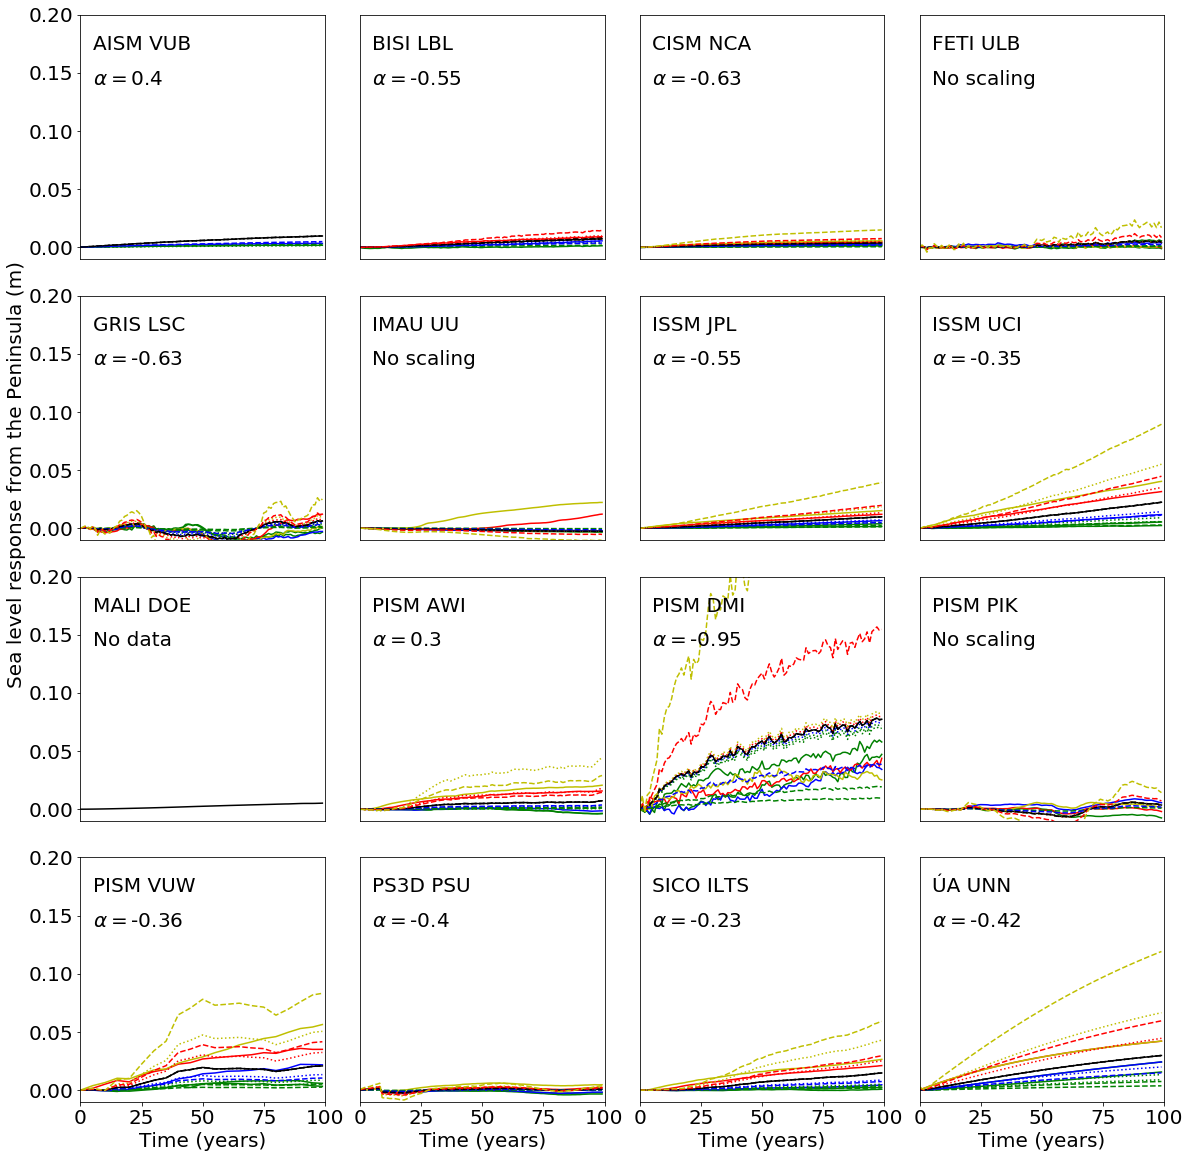

In [21]:
fp, axes = plt.subplots(4, 4,figsize=(figwidth,figwidth))
#fp.subplots_adjust(hspace=0.2, wspace=0.01)
fp.subplots_adjust(hspace=0.15, wspace=0.01)

# AISM_VUB

ax = axes[0,0]
ax.plot(AISM_VUB_BM02_R5[:endyear],'g')
ax.plot(AISM_VUB_BM04_R5[:endyear],'b')
ax.plot(AISM_VUB_BM08_R5[:endyear],'k')

ax.plot(AISM_VUB_BM02_R5_scaled[:endyear],':g')
ax.plot(AISM_VUB_BM04_R5_scaled[:endyear],':b')
ax.plot(AISM_VUB_BM08_R5_scaled[:endyear],':k')

ax.plot(AISM_VUB_BM02_R5_scaled1[:endyear],'--g')
ax.plot(AISM_VUB_BM04_R5_scaled1[:endyear],'--b')
ax.plot(AISM_VUB_BM08_R5_scaled1[:endyear],'--k')

ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"AISM VUB",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_AISM_VUB_BM08_R5,2))
#ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# BISI_LBL

ax = axes[0,1]
ax.plot(BISI_LBL_BM08_500M_R5[:endyear],'--k')#,linewidth=5.0)

ax.plot(BISI_LBL_BM02_R5[:endyear],'g')
ax.plot(BISI_LBL_BM04_R5[:endyear],'b')
ax.plot(BISI_LBL_BM08_R5[:endyear],'k')
ax.plot(BISI_LBL_BM16_R5[:endyear],'r')

ax.plot(BISI_LBL_BM02_R5_scaled[:endyear],':g')
ax.plot(BISI_LBL_BM04_R5_scaled[:endyear],':b')
ax.plot(BISI_LBL_BM08_R5_scaled[:endyear],':k')
ax.plot(BISI_LBL_BM16_R5_scaled[:endyear],':r')

ax.plot(BISI_LBL_BM02_R5_scaled1[:endyear],'--g')
ax.plot(BISI_LBL_BM04_R5_scaled1[:endyear],'--b')
ax.plot(BISI_LBL_BM08_R5_scaled1[:endyear],'--k')
ax.plot(BISI_LBL_BM16_R5_scaled1[:endyear],'--r')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"BISI LBL",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_BISI_LBL_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# CISM_NCA

ax = axes[0,2]

ax.plot(CISM_NCA_BM01_R5[:endyear],'g')
ax.plot(CISM_NCA_BM02_R5[:endyear],'g')
ax.plot(CISM_NCA_BM04_R5[:endyear],'b')
ax.plot(CISM_NCA_BM08_R5[:endyear],'k')
ax.plot(CISM_NCA_BM16_R5[:endyear],'r')
ax.plot(CISM_NCA_BM32_R5[:endyear],'y')

ax.plot(CISM_NCA_BM01_R5_scaled[:endyear],':g')
ax.plot(CISM_NCA_BM02_R5_scaled[:endyear],':g')
ax.plot(CISM_NCA_BM04_R5_scaled[:endyear],':b')
ax.plot(CISM_NCA_BM08_R5_scaled[:endyear],':k')
ax.plot(CISM_NCA_BM16_R5_scaled[:endyear],':r')
ax.plot(CISM_NCA_BM32_R5_scaled[:endyear],':y')

ax.plot(CISM_NCA_BM01_R5_scaled1[:endyear],'--g')
ax.plot(CISM_NCA_BM02_R5_scaled1[:endyear],'--g')
ax.plot(CISM_NCA_BM04_R5_scaled1[:endyear],'--b')
ax.plot(CISM_NCA_BM08_R5_scaled1[:endyear],'--k')
ax.plot(CISM_NCA_BM16_R5_scaled1[:endyear],'--r')
ax.plot(CISM_NCA_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"CISM NCA",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_CISM_NCA_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# FETI_VUB
ax = axes[0,3]
ax.plot(FETI_VUB_BM01_R5[:endyear],'g')
ax.plot(FETI_VUB_BM02_R5[:endyear],'g')
ax.plot(FETI_VUB_BM04_R5[:endyear],'b')
ax.plot(FETI_VUB_BM08_R5[:endyear],'k')
ax.plot(FETI_VUB_BM16_R5[:endyear],'r')
ax.plot(FETI_VUB_BM32_R5[:endyear],'y')

ax.plot(FETI_VUB_BM01_R5_scaled[:endyear],':g')
ax.plot(FETI_VUB_BM02_R5_scaled[:endyear],':g')
ax.plot(FETI_VUB_BM04_R5_scaled[:endyear],':b')
ax.plot(FETI_VUB_BM08_R5_scaled[:endyear],':k')
ax.plot(FETI_VUB_BM16_R5_scaled[:endyear],':r')
ax.plot(FETI_VUB_BM32_R5_scaled[:endyear],':y')

ax.plot(FETI_VUB_BM01_R5_scaled1[:endyear],'--g')
ax.plot(FETI_VUB_BM02_R5_scaled1[:endyear],'--g')
ax.plot(FETI_VUB_BM04_R5_scaled1[:endyear],'--b')
ax.plot(FETI_VUB_BM08_R5_scaled1[:endyear],'--k')
ax.plot(FETI_VUB_BM16_R5_scaled1[:endyear],'--r')
ax.plot(FETI_VUB_BM32_R5_scaled1[:endyear],'--y')


ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"FETI ULB",fontsize = SizeOfFont)
#ScalingText = r"$\alpha = $" + str(np.round(SF_FETI_VUB_BM08_R5,2))
ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R2,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# GRIS_LSC
ax = axes[1,0]
ax.plot(GRIS_LSC_BM01_R5[:endyear],'g')
ax.plot(GRIS_LSC_BM02_R5[:endyear],'g')
ax.plot(GRIS_LSC_BM04_R5[:endyear],'b')
ax.plot(GRIS_LSC_BM08_R5[:endyear],'k')
ax.plot(GRIS_LSC_BM16_R5[:endyear],'r')
ax.plot(GRIS_LSC_BM32_R5[:endyear],'y')

ax.plot(GRIS_LSC_BM01_R5_scaled[:endyear],':g')
ax.plot(GRIS_LSC_BM02_R5_scaled[:endyear],':g')
ax.plot(GRIS_LSC_BM04_R5_scaled[:endyear],':b')
ax.plot(GRIS_LSC_BM08_R5_scaled[:endyear],':k')
ax.plot(GRIS_LSC_BM16_R5_scaled[:endyear],':r')
ax.plot(GRIS_LSC_BM32_R5_scaled[:endyear],':y')

ax.plot(GRIS_LSC_BM01_R5_scaled1[:endyear],'--g')
ax.plot(GRIS_LSC_BM02_R5_scaled1[:endyear],'--g')
ax.plot(GRIS_LSC_BM04_R5_scaled1[:endyear],'--b')
ax.plot(GRIS_LSC_BM08_R5_scaled1[:endyear],'--k')
ax.plot(GRIS_LSC_BM16_R5_scaled1[:endyear],'--r')
ax.plot(GRIS_LSC_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"GRIS LSC",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_GRIS_LSC_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R3,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# IMAU_VUB
ax = axes[1,1]
ax.plot(IMAU_VUB_BM01_R5[:endyear],'g')
ax.plot(IMAU_VUB_BM02_R5[:endyear],'g')
ax.plot(IMAU_VUB_BM04_R5[:endyear],'b')
ax.plot(IMAU_VUB_BM08_R5[:endyear],'k')
ax.plot(IMAU_VUB_BM16_R5[:endyear],'r')
ax.plot(IMAU_VUB_BM32_R5[:endyear],'y')

ax.plot(IMAU_VUB_BM01_R5_scaled[:endyear],':g')
ax.plot(IMAU_VUB_BM02_R5_scaled[:endyear],':g')
ax.plot(IMAU_VUB_BM04_R5_scaled[:endyear],':b')
ax.plot(IMAU_VUB_BM08_R5_scaled[:endyear],':k')
ax.plot(IMAU_VUB_BM16_R5_scaled[:endyear],':r')
ax.plot(IMAU_VUB_BM32_R5_scaled[:endyear],':y')

ax.plot(IMAU_VUB_BM01_R5_scaled1[:endyear],'--g')
ax.plot(IMAU_VUB_BM02_R5_scaled1[:endyear],'--g')
ax.plot(IMAU_VUB_BM04_R5_scaled1[:endyear],'--b')
ax.plot(IMAU_VUB_BM08_R5_scaled1[:endyear],'--k')
ax.plot(IMAU_VUB_BM16_R5_scaled1[:endyear],'--r')
ax.plot(IMAU_VUB_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"IMAU UU",fontsize = SizeOfFont)
#ScalingText = r"$\alpha = $" + str(np.round(SF_IMAU_VUB_BM08_R5,2))
ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# ISSM_JPL
ax = axes[1,2]
ax.plot(ISSM_JPL_BM01_R5[:endyear],'g')
ax.plot(ISSM_JPL_BM02_R5[:endyear],'g')
ax.plot(ISSM_JPL_BM04_R5[:endyear],'b')
ax.plot(ISSM_JPL_BM08_R5[:endyear],'k')
ax.plot(ISSM_JPL_BM16_R5[:endyear],'r')
ax.plot(ISSM_JPL_BM32_R5[:endyear],'y')

ax.plot(ISSM_JPL_BM01_R5_scaled[:endyear],':g')
ax.plot(ISSM_JPL_BM02_R5_scaled[:endyear],':g')
ax.plot(ISSM_JPL_BM04_R5_scaled[:endyear],':b')
ax.plot(ISSM_JPL_BM08_R5_scaled[:endyear],':k')
ax.plot(ISSM_JPL_BM16_R5_scaled[:endyear],':r')
ax.plot(ISSM_JPL_BM32_R5_scaled[:endyear],':y')

ax.plot(ISSM_JPL_BM01_R5_scaled1[:endyear],'--g')
ax.plot(ISSM_JPL_BM02_R5_scaled1[:endyear],'--g')
ax.plot(ISSM_JPL_BM04_R5_scaled1[:endyear],'--b')
ax.plot(ISSM_JPL_BM08_R5_scaled1[:endyear],'--k')
ax.plot(ISSM_JPL_BM16_R5_scaled1[:endyear],'--r')
ax.plot(ISSM_JPL_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"ISSM JPL",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_ISSM_JPL_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# ISSM_UCI
ax = axes[1,3]
ax.plot(ISSM_UCI_BM01_R5[:endyear],'g')
ax.plot(ISSM_UCI_BM02_R5[:endyear],'g')
ax.plot(ISSM_UCI_BM04_R5[:endyear],'b')
ax.plot(ISSM_UCI_BM08_R5[:endyear],'k')
ax.plot(ISSM_UCI_BM16_R5[:endyear],'r')
ax.plot(ISSM_UCI_BM32_R5[:endyear],'y')

ax.plot(ISSM_UCI_BM01_R5_scaled[:endyear],':g')
ax.plot(ISSM_UCI_BM02_R5_scaled[:endyear],':g')
ax.plot(ISSM_UCI_BM04_R5_scaled[:endyear],':b')
ax.plot(ISSM_UCI_BM08_R5_scaled[:endyear],':k')
ax.plot(ISSM_UCI_BM16_R5_scaled[:endyear],':r')
ax.plot(ISSM_UCI_BM32_R5_scaled[:endyear],':y')

ax.plot(ISSM_UCI_BM01_R5_scaled1[:endyear],'--g')
ax.plot(ISSM_UCI_BM02_R5_scaled1[:endyear],'--g')
ax.plot(ISSM_UCI_BM04_R5_scaled1[:endyear],'--b')
ax.plot(ISSM_UCI_BM08_R5_scaled1[:endyear],'--k')
ax.plot(ISSM_UCI_BM16_R5_scaled1[:endyear],'--r')
ax.plot(ISSM_UCI_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
#ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("right")
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"ISSM UCI",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_ISSM_UCI_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R0,2))
#ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)


# MALI_LAN
ax = axes[2,0]
ax.plot(MALI_LAN_BM08_R5[:endyear],'k')

ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"MALI DOE",fontsize = SizeOfFont)
ScalingText = r"No data"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_AWI
ax = axes[2,1]
ax.plot(PISM_AWI_BM01_R5[:endyear],'g')
ax.plot(PISM_AWI_BM02_R5[:endyear],'g')
ax.plot(PISM_AWI_BM04_R5[:endyear],'b')
ax.plot(PISM_AWI_BM08_R5[:endyear],'k')
ax.plot(PISM_AWI_BM16_R5[:endyear],'r')
ax.plot(PISM_AWI_BM32_R5[:endyear],'y')

ax.plot(PISM_AWI_BM01_R5_scaled[:endyear],':g')
ax.plot(PISM_AWI_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_AWI_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_AWI_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_AWI_BM16_R5_scaled[:endyear],':r')
ax.plot(PISM_AWI_BM32_R5_scaled[:endyear],':y')

ax.plot(PISM_AWI_BM01_R5_scaled1[:endyear],'--g')
ax.plot(PISM_AWI_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_AWI_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_AWI_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_AWI_BM16_R5_scaled1[:endyear],'--r')
ax.plot(PISM_AWI_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM AWI",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_AWI_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_DMI
ax = axes[2,2]
ax.plot(PISM_DMI_BM01_R5[:endyear],'g')
ax.plot(PISM_DMI_BM02_R5[:endyear],'g')
ax.plot(PISM_DMI_BM04_R5[:endyear],'b')
ax.plot(PISM_DMI_BM08_R5[:endyear],'k')
ax.plot(PISM_DMI_BM16_R5[:endyear],'r')
ax.plot(PISM_DMI_BM32_R5[:endyear],'y')

ax.plot(PISM_DMI_BM01_R5_scaled[:endyear],':g')
ax.plot(PISM_DMI_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_DMI_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_DMI_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_DMI_BM16_R5_scaled[:endyear],':r')
ax.plot(PISM_DMI_BM32_R5_scaled[:endyear],':y')

ax.plot(PISM_DMI_BM01_R5_scaled1[:endyear],'--g')
ax.plot(PISM_DMI_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_DMI_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_DMI_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_DMI_BM16_R5_scaled1[:endyear],'--r')
ax.plot(PISM_DMI_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM DMI",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_DMI_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_PIK
ax = axes[2,3]
#ax.plot(PISM_PIK_BM01_R5[:endyear],'g')
ax.plot(PISM_PIK_BM02_R5[:endyear],'g')
ax.plot(PISM_PIK_BM04_R5[:endyear],'b')
ax.plot(PISM_PIK_BM08_R5[:endyear],'k')
ax.plot(PISM_PIK_BM16_R5[:endyear],'r')
ax.plot(PISM_PIK_BM32_R5[:endyear],'y')

#ax.plot(PISM_PIK_BM01_R5_scaled[:endyear],':g')
ax.plot(PISM_PIK_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_PIK_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_PIK_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_PIK_BM16_R5_scaled[:endyear],':r')
ax.plot(PISM_PIK_BM32_R5_scaled[:endyear],':y')

#ax.plot(PISM_PIK_BM01_R5_scaled1[:endyear],'--g')
ax.plot(PISM_PIK_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_PIK_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_PIK_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_PIK_BM16_R5_scaled1[:endyear],'--r')
ax.plot(PISM_PIK_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM PIK",fontsize = SizeOfFont)
#ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_PIK_BM08_R5,2))
ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_VUW
ax = axes[3,0]
ax.plot(PISM_VUW_BM01_R5[:endyear],'g')
ax.plot(PISM_VUW_BM02_R5[:endyear],'g')
ax.plot(PISM_VUW_BM04_R5[:endyear],'b')
ax.plot(PISM_VUW_BM08_R5[:endyear],'k')
ax.plot(PISM_VUW_BM16_R5[:endyear],'r')
ax.plot(PISM_VUW_BM32_R5[:endyear],'y')

ax.plot(PISM_VUW_BM01_R5_scaled[:endyear],':g')
ax.plot(PISM_VUW_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_VUW_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_VUW_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_VUW_BM16_R5_scaled[:endyear],':r')
ax.plot(PISM_VUW_BM32_R5_scaled[:endyear],':y')

ax.plot(PISM_VUW_BM01_R5_scaled1[:endyear],'--g')
ax.plot(PISM_VUW_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_VUW_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_VUW_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_VUW_BM16_R5_scaled1[:endyear],'--r')
ax.plot(PISM_VUW_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
#ax.yaxis.set_label_position("right")
#ax.yaxis.set_ticks_position("right")
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM VUW",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_VUW_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.text(XlabelXPos, XlabelYPos,"Sea level response from the Peninsula (m)",fontsize = SizeOfFont, rotation = 90)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R0,2))
#ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)

# PS3D_PSU
ax = axes[3,1]
ax.plot(PS3D_PSU_BM01_R5[:endyear],'g')
ax.plot(PS3D_PSU_BM02_R5[:endyear],'g')
ax.plot(PS3D_PSU_BM04_R5[:endyear],'b')
ax.plot(PS3D_PSU_BM08_R5[:endyear],'k')
ax.plot(PS3D_PSU_BM16_R5[:endyear],'r')
ax.plot(PS3D_PSU_BM32_R5[:endyear],'y')

ax.plot(PS3D_PSU_BM01_R5_scaled[:endyear],':g')
ax.plot(PS3D_PSU_BM02_R5_scaled[:endyear],':g')
ax.plot(PS3D_PSU_BM04_R5_scaled[:endyear],':b')
ax.plot(PS3D_PSU_BM08_R5_scaled[:endyear],':k')
ax.plot(PS3D_PSU_BM16_R5_scaled[:endyear],':r')
ax.plot(PS3D_PSU_BM32_R5_scaled[:endyear],':y')

ax.plot(PS3D_PSU_BM01_R5_scaled1[:endyear],'--g')
ax.plot(PS3D_PSU_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PS3D_PSU_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PS3D_PSU_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PS3D_PSU_BM16_R5_scaled1[:endyear],'--r')
ax.plot(PS3D_PSU_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PS3D PSU",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PS3D_PSU_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)
#ax.xaxis.set_ticks(np.arange(0, 101, 50))


# SICO_UHO
ax = axes[3,2]
ax.plot(SICO_UHO_BM01_R5[:endyear],'g')
ax.plot(SICO_UHO_BM02_R5[:endyear],'g')
ax.plot(SICO_UHO_BM04_R5[:endyear],'b')
ax.plot(SICO_UHO_BM08_R5[:endyear],'k')
ax.plot(SICO_UHO_BM16_R5[:endyear],'r')
ax.plot(SICO_UHO_BM32_R5[:endyear],'y')

ax.plot(SICO_UHO_BM01_R5_scaled[:endyear],':g')
ax.plot(SICO_UHO_BM02_R5_scaled[:endyear],':g')
ax.plot(SICO_UHO_BM04_R5_scaled[:endyear],':b')
ax.plot(SICO_UHO_BM08_R5_scaled[:endyear],':k')
ax.plot(SICO_UHO_BM16_R5_scaled[:endyear],':r')
ax.plot(SICO_UHO_BM32_R5_scaled[:endyear],':y')

ax.plot(SICO_UHO_BM01_R5_scaled1[:endyear],'--g')
ax.plot(SICO_UHO_BM02_R5_scaled1[:endyear],'--g')
ax.plot(SICO_UHO_BM04_R5_scaled1[:endyear],'--b')
ax.plot(SICO_UHO_BM08_R5_scaled1[:endyear],'--k')
ax.plot(SICO_UHO_BM16_R5_scaled1[:endyear],'--r')
ax.plot(SICO_UHO_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"SICO ILTS",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_SICO_UHO_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ax.xaxis.set_ticks(np.arange(0, 101, 50))
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# UA_UNN
ax = axes[3,3]
ax.plot(UA_UNN_BM01_R5[:endyear],'g')
ax.plot(UA_UNN_BM02_R5[:endyear],'g')
ax.plot(UA_UNN_BM04_R5[:endyear],'b')
ax.plot(UA_UNN_BM08_R5[:endyear],'k')
ax.plot(UA_UNN_BM16_R5[:endyear],'r')
ax.plot(UA_UNN_BM32_R5[:endyear],'y')

ax.plot(UA_UNN_BM01_R5_scaled[:endyear],':g')
ax.plot(UA_UNN_BM02_R5_scaled[:endyear],':g')
ax.plot(UA_UNN_BM04_R5_scaled[:endyear],':b')
ax.plot(UA_UNN_BM08_R5_scaled[:endyear],':k')
ax.plot(UA_UNN_BM16_R5_scaled[:endyear],':r')
ax.plot(UA_UNN_BM32_R5_scaled[:endyear],':y')

ax.plot(UA_UNN_BM01_R5_scaled1[:endyear],'--g')
ax.plot(UA_UNN_BM02_R5_scaled1[:endyear],'--g')
ax.plot(UA_UNN_BM04_R5_scaled1[:endyear],'--b')
ax.plot(UA_UNN_BM08_R5_scaled1[:endyear],'--k')
ax.plot(UA_UNN_BM16_R5_scaled1[:endyear],'--r')
ax.plot(UA_UNN_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("right")
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"ÚA UNN",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_UA_UNN_BM08_R5,2))
#ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ax.xaxis.set_ticks(np.arange(0, 101, 50))
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R0,2))
#ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)



fp.savefig("Figures/Linearity_Peninsula_full.pdf", bbox_inches='tight')

In [22]:
# Set plotting variables
SizeOfFont = 20

# For all panels but Whole Antarctica
xmin = 0
xmax = 200
ymin = -0.01
ymax = 0.4
xlimit = [xmin, xmax]
ylimit = [ymin, ymax]
AspectRatio = 1.0*((xmax-xmin)/(ymax-ymin))


figwidth = 20

ScalingTextXPos= xmin+10
ScalingTextYPos= ymax-0.04
ScalingTextXPos2= xmin+10
ScalingTextYPos2= ymax-0.08
XlabelXPos = xmin-50
XlabelYPos = ymax+0.8

endyear = 200

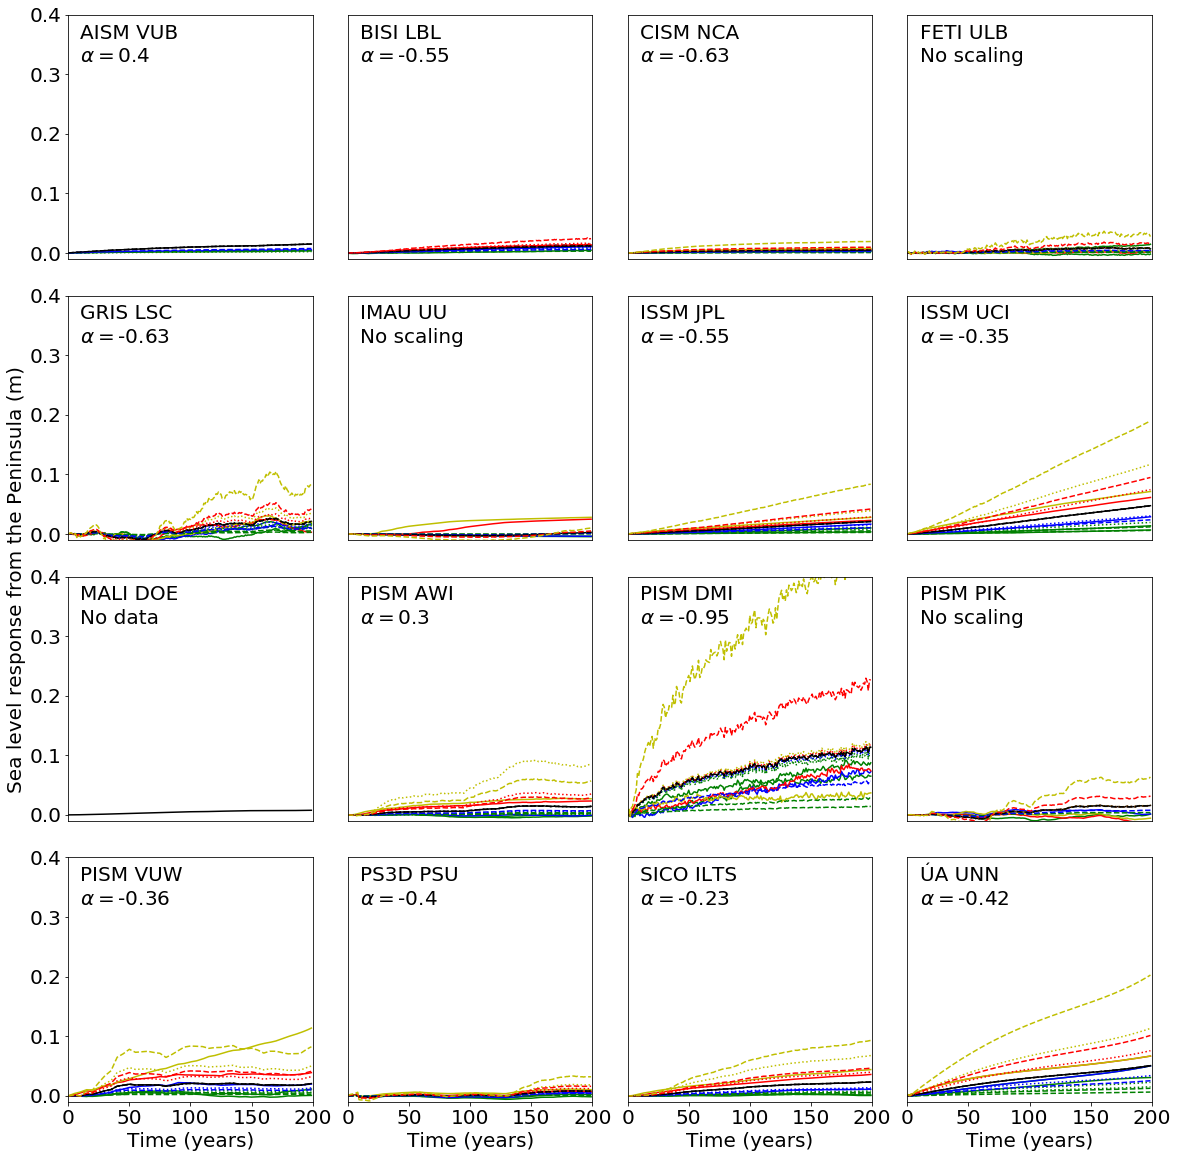

In [23]:
fp, axes = plt.subplots(4, 4,figsize=(figwidth,figwidth))
#fp.subplots_adjust(hspace=0.2, wspace=0.01)
fp.subplots_adjust(hspace=0.15, wspace=0.01)

# AISM_VUB

ax = axes[0,0]
ax.plot(AISM_VUB_BM02_R5[:endyear],'g')
ax.plot(AISM_VUB_BM04_R5[:endyear],'b')
ax.plot(AISM_VUB_BM08_R5[:endyear],'k')

ax.plot(AISM_VUB_BM02_R5_scaled[:endyear],':g')
ax.plot(AISM_VUB_BM04_R5_scaled[:endyear],':b')
ax.plot(AISM_VUB_BM08_R5_scaled[:endyear],':k')

ax.plot(AISM_VUB_BM02_R5_scaled1[:endyear],'--g')
ax.plot(AISM_VUB_BM04_R5_scaled1[:endyear],'--b')
ax.plot(AISM_VUB_BM08_R5_scaled1[:endyear],'--k')

ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"AISM VUB",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_AISM_VUB_BM08_R5,2))
#ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# BISI_LBL

ax = axes[0,1]
ax.plot(BISI_LBL_BM08_500M_R5[:endyear],'--k')#,linewidth=5.0)

ax.plot(BISI_LBL_BM02_R5[:endyear],'g')
ax.plot(BISI_LBL_BM04_R5[:endyear],'b')
ax.plot(BISI_LBL_BM08_R5[:endyear],'k')
ax.plot(BISI_LBL_BM16_R5[:endyear],'r')

ax.plot(BISI_LBL_BM02_R5_scaled[:endyear],':g')
ax.plot(BISI_LBL_BM04_R5_scaled[:endyear],':b')
ax.plot(BISI_LBL_BM08_R5_scaled[:endyear],':k')
ax.plot(BISI_LBL_BM16_R5_scaled[:endyear],':r')

ax.plot(BISI_LBL_BM02_R5_scaled1[:endyear],'--g')
ax.plot(BISI_LBL_BM04_R5_scaled1[:endyear],'--b')
ax.plot(BISI_LBL_BM08_R5_scaled1[:endyear],'--k')
ax.plot(BISI_LBL_BM16_R5_scaled1[:endyear],'--r')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"BISI LBL",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_BISI_LBL_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# CISM_NCA

ax = axes[0,2]

ax.plot(CISM_NCA_BM01_R5[:endyear],'g')
ax.plot(CISM_NCA_BM02_R5[:endyear],'g')
ax.plot(CISM_NCA_BM04_R5[:endyear],'b')
ax.plot(CISM_NCA_BM08_R5[:endyear],'k')
ax.plot(CISM_NCA_BM16_R5[:endyear],'r')
ax.plot(CISM_NCA_BM32_R5[:endyear],'y')

ax.plot(CISM_NCA_BM01_R5_scaled[:endyear],':g')
ax.plot(CISM_NCA_BM02_R5_scaled[:endyear],':g')
ax.plot(CISM_NCA_BM04_R5_scaled[:endyear],':b')
ax.plot(CISM_NCA_BM08_R5_scaled[:endyear],':k')
ax.plot(CISM_NCA_BM16_R5_scaled[:endyear],':r')
ax.plot(CISM_NCA_BM32_R5_scaled[:endyear],':y')

ax.plot(CISM_NCA_BM01_R5_scaled1[:endyear],'--g')
ax.plot(CISM_NCA_BM02_R5_scaled1[:endyear],'--g')
ax.plot(CISM_NCA_BM04_R5_scaled1[:endyear],'--b')
ax.plot(CISM_NCA_BM08_R5_scaled1[:endyear],'--k')
ax.plot(CISM_NCA_BM16_R5_scaled1[:endyear],'--r')
ax.plot(CISM_NCA_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"CISM NCA",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_CISM_NCA_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# FETI_VUB
ax = axes[0,3]
ax.plot(FETI_VUB_BM01_R5[:endyear],'g')
ax.plot(FETI_VUB_BM02_R5[:endyear],'g')
ax.plot(FETI_VUB_BM04_R5[:endyear],'b')
ax.plot(FETI_VUB_BM08_R5[:endyear],'k')
ax.plot(FETI_VUB_BM16_R5[:endyear],'r')
ax.plot(FETI_VUB_BM32_R5[:endyear],'y')

ax.plot(FETI_VUB_BM01_R5_scaled[:endyear],':g')
ax.plot(FETI_VUB_BM02_R5_scaled[:endyear],':g')
ax.plot(FETI_VUB_BM04_R5_scaled[:endyear],':b')
ax.plot(FETI_VUB_BM08_R5_scaled[:endyear],':k')
ax.plot(FETI_VUB_BM16_R5_scaled[:endyear],':r')
ax.plot(FETI_VUB_BM32_R5_scaled[:endyear],':y')

ax.plot(FETI_VUB_BM01_R5_scaled1[:endyear],'--g')
ax.plot(FETI_VUB_BM02_R5_scaled1[:endyear],'--g')
ax.plot(FETI_VUB_BM04_R5_scaled1[:endyear],'--b')
ax.plot(FETI_VUB_BM08_R5_scaled1[:endyear],'--k')
ax.plot(FETI_VUB_BM16_R5_scaled1[:endyear],'--r')
ax.plot(FETI_VUB_BM32_R5_scaled1[:endyear],'--y')


ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"FETI ULB",fontsize = SizeOfFont)
#ScalingText = r"$\alpha = $" + str(np.round(SF_FETI_VUB_BM08_R5,2))
ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R2,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# GRIS_LSC
ax = axes[1,0]
ax.plot(GRIS_LSC_BM01_R5[:endyear],'g')
ax.plot(GRIS_LSC_BM02_R5[:endyear],'g')
ax.plot(GRIS_LSC_BM04_R5[:endyear],'b')
ax.plot(GRIS_LSC_BM08_R5[:endyear],'k')
ax.plot(GRIS_LSC_BM16_R5[:endyear],'r')
ax.plot(GRIS_LSC_BM32_R5[:endyear],'y')

ax.plot(GRIS_LSC_BM01_R5_scaled[:endyear],':g')
ax.plot(GRIS_LSC_BM02_R5_scaled[:endyear],':g')
ax.plot(GRIS_LSC_BM04_R5_scaled[:endyear],':b')
ax.plot(GRIS_LSC_BM08_R5_scaled[:endyear],':k')
ax.plot(GRIS_LSC_BM16_R5_scaled[:endyear],':r')
ax.plot(GRIS_LSC_BM32_R5_scaled[:endyear],':y')

ax.plot(GRIS_LSC_BM01_R5_scaled1[:endyear],'--g')
ax.plot(GRIS_LSC_BM02_R5_scaled1[:endyear],'--g')
ax.plot(GRIS_LSC_BM04_R5_scaled1[:endyear],'--b')
ax.plot(GRIS_LSC_BM08_R5_scaled1[:endyear],'--k')
ax.plot(GRIS_LSC_BM16_R5_scaled1[:endyear],'--r')
ax.plot(GRIS_LSC_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"GRIS LSC",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_GRIS_LSC_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R3,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# IMAU_VUB
ax = axes[1,1]
ax.plot(IMAU_VUB_BM01_R5[:endyear],'g')
ax.plot(IMAU_VUB_BM02_R5[:endyear],'g')
ax.plot(IMAU_VUB_BM04_R5[:endyear],'b')
ax.plot(IMAU_VUB_BM08_R5[:endyear],'k')
ax.plot(IMAU_VUB_BM16_R5[:endyear],'r')
ax.plot(IMAU_VUB_BM32_R5[:endyear],'y')

ax.plot(IMAU_VUB_BM01_R5_scaled[:endyear],':g')
ax.plot(IMAU_VUB_BM02_R5_scaled[:endyear],':g')
ax.plot(IMAU_VUB_BM04_R5_scaled[:endyear],':b')
ax.plot(IMAU_VUB_BM08_R5_scaled[:endyear],':k')
ax.plot(IMAU_VUB_BM16_R5_scaled[:endyear],':r')
ax.plot(IMAU_VUB_BM32_R5_scaled[:endyear],':y')

ax.plot(IMAU_VUB_BM01_R5_scaled1[:endyear],'--g')
ax.plot(IMAU_VUB_BM02_R5_scaled1[:endyear],'--g')
ax.plot(IMAU_VUB_BM04_R5_scaled1[:endyear],'--b')
ax.plot(IMAU_VUB_BM08_R5_scaled1[:endyear],'--k')
ax.plot(IMAU_VUB_BM16_R5_scaled1[:endyear],'--r')
ax.plot(IMAU_VUB_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"IMAU UU",fontsize = SizeOfFont)
#ScalingText = r"$\alpha = $" + str(np.round(SF_IMAU_VUB_BM08_R5,2))
ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# ISSM_JPL
ax = axes[1,2]
ax.plot(ISSM_JPL_BM01_R5[:endyear],'g')
ax.plot(ISSM_JPL_BM02_R5[:endyear],'g')
ax.plot(ISSM_JPL_BM04_R5[:endyear],'b')
ax.plot(ISSM_JPL_BM08_R5[:endyear],'k')
ax.plot(ISSM_JPL_BM16_R5[:endyear],'r')
ax.plot(ISSM_JPL_BM32_R5[:endyear],'y')

ax.plot(ISSM_JPL_BM01_R5_scaled[:endyear],':g')
ax.plot(ISSM_JPL_BM02_R5_scaled[:endyear],':g')
ax.plot(ISSM_JPL_BM04_R5_scaled[:endyear],':b')
ax.plot(ISSM_JPL_BM08_R5_scaled[:endyear],':k')
ax.plot(ISSM_JPL_BM16_R5_scaled[:endyear],':r')
ax.plot(ISSM_JPL_BM32_R5_scaled[:endyear],':y')

ax.plot(ISSM_JPL_BM01_R5_scaled1[:endyear],'--g')
ax.plot(ISSM_JPL_BM02_R5_scaled1[:endyear],'--g')
ax.plot(ISSM_JPL_BM04_R5_scaled1[:endyear],'--b')
ax.plot(ISSM_JPL_BM08_R5_scaled1[:endyear],'--k')
ax.plot(ISSM_JPL_BM16_R5_scaled1[:endyear],'--r')
ax.plot(ISSM_JPL_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"ISSM JPL",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_ISSM_JPL_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# ISSM_UCI
ax = axes[1,3]
ax.plot(ISSM_UCI_BM01_R5[:endyear],'g')
ax.plot(ISSM_UCI_BM02_R5[:endyear],'g')
ax.plot(ISSM_UCI_BM04_R5[:endyear],'b')
ax.plot(ISSM_UCI_BM08_R5[:endyear],'k')
ax.plot(ISSM_UCI_BM16_R5[:endyear],'r')
ax.plot(ISSM_UCI_BM32_R5[:endyear],'y')

ax.plot(ISSM_UCI_BM01_R5_scaled[:endyear],':g')
ax.plot(ISSM_UCI_BM02_R5_scaled[:endyear],':g')
ax.plot(ISSM_UCI_BM04_R5_scaled[:endyear],':b')
ax.plot(ISSM_UCI_BM08_R5_scaled[:endyear],':k')
ax.plot(ISSM_UCI_BM16_R5_scaled[:endyear],':r')
ax.plot(ISSM_UCI_BM32_R5_scaled[:endyear],':y')

ax.plot(ISSM_UCI_BM01_R5_scaled1[:endyear],'--g')
ax.plot(ISSM_UCI_BM02_R5_scaled1[:endyear],'--g')
ax.plot(ISSM_UCI_BM04_R5_scaled1[:endyear],'--b')
ax.plot(ISSM_UCI_BM08_R5_scaled1[:endyear],'--k')
ax.plot(ISSM_UCI_BM16_R5_scaled1[:endyear],'--r')
ax.plot(ISSM_UCI_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
#ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("right")
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"ISSM UCI",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_ISSM_UCI_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R0,2))
#ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)


# MALI_LAN
ax = axes[2,0]
ax.plot(MALI_LAN_BM08_R5[:endyear],'k')

ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"MALI DOE",fontsize = SizeOfFont)
ScalingText = r"No data"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_AWI
ax = axes[2,1]
ax.plot(PISM_AWI_BM01_R5[:endyear],'g')
ax.plot(PISM_AWI_BM02_R5[:endyear],'g')
ax.plot(PISM_AWI_BM04_R5[:endyear],'b')
ax.plot(PISM_AWI_BM08_R5[:endyear],'k')
ax.plot(PISM_AWI_BM16_R5[:endyear],'r')
ax.plot(PISM_AWI_BM32_R5[:endyear],'y')

ax.plot(PISM_AWI_BM01_R5_scaled[:endyear],':g')
ax.plot(PISM_AWI_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_AWI_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_AWI_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_AWI_BM16_R5_scaled[:endyear],':r')
ax.plot(PISM_AWI_BM32_R5_scaled[:endyear],':y')

ax.plot(PISM_AWI_BM01_R5_scaled1[:endyear],'--g')
ax.plot(PISM_AWI_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_AWI_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_AWI_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_AWI_BM16_R5_scaled1[:endyear],'--r')
ax.plot(PISM_AWI_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM AWI",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_AWI_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_DMI
ax = axes[2,2]
ax.plot(PISM_DMI_BM01_R5[:endyear],'g')
ax.plot(PISM_DMI_BM02_R5[:endyear],'g')
ax.plot(PISM_DMI_BM04_R5[:endyear],'b')
ax.plot(PISM_DMI_BM08_R5[:endyear],'k')
ax.plot(PISM_DMI_BM16_R5[:endyear],'r')
ax.plot(PISM_DMI_BM32_R5[:endyear],'y')

ax.plot(PISM_DMI_BM01_R5_scaled[:endyear],':g')
ax.plot(PISM_DMI_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_DMI_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_DMI_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_DMI_BM16_R5_scaled[:endyear],':r')
ax.plot(PISM_DMI_BM32_R5_scaled[:endyear],':y')

ax.plot(PISM_DMI_BM01_R5_scaled1[:endyear],'--g')
ax.plot(PISM_DMI_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_DMI_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_DMI_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_DMI_BM16_R5_scaled1[:endyear],'--r')
ax.plot(PISM_DMI_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM DMI",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_DMI_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_PIK
ax = axes[2,3]
#ax.plot(PISM_PIK_BM01_R5[:endyear],'g')
ax.plot(PISM_PIK_BM02_R5[:endyear],'g')
ax.plot(PISM_PIK_BM04_R5[:endyear],'b')
ax.plot(PISM_PIK_BM08_R5[:endyear],'k')
ax.plot(PISM_PIK_BM16_R5[:endyear],'r')
ax.plot(PISM_PIK_BM32_R5[:endyear],'y')

#ax.plot(PISM_PIK_BM01_R5_scaled[:endyear],':g')
ax.plot(PISM_PIK_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_PIK_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_PIK_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_PIK_BM16_R5_scaled[:endyear],':r')
ax.plot(PISM_PIK_BM32_R5_scaled[:endyear],':y')

#ax.plot(PISM_PIK_BM01_R5_scaled1[:endyear],'--g')
ax.plot(PISM_PIK_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_PIK_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_PIK_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_PIK_BM16_R5_scaled1[:endyear],'--r')
ax.plot(PISM_PIK_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM PIK",fontsize = SizeOfFont)
#ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_PIK_BM08_R5,2))
ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_VUW
ax = axes[3,0]
ax.plot(PISM_VUW_BM01_R5[:endyear],'g')
ax.plot(PISM_VUW_BM02_R5[:endyear],'g')
ax.plot(PISM_VUW_BM04_R5[:endyear],'b')
ax.plot(PISM_VUW_BM08_R5[:endyear],'k')
ax.plot(PISM_VUW_BM16_R5[:endyear],'r')
ax.plot(PISM_VUW_BM32_R5[:endyear],'y')

ax.plot(PISM_VUW_BM01_R5_scaled[:endyear],':g')
ax.plot(PISM_VUW_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_VUW_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_VUW_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_VUW_BM16_R5_scaled[:endyear],':r')
ax.plot(PISM_VUW_BM32_R5_scaled[:endyear],':y')

ax.plot(PISM_VUW_BM01_R5_scaled1[:endyear],'--g')
ax.plot(PISM_VUW_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_VUW_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_VUW_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_VUW_BM16_R5_scaled1[:endyear],'--r')
ax.plot(PISM_VUW_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
#ax.yaxis.set_label_position("right")
#ax.yaxis.set_ticks_position("right")
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM VUW",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_VUW_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.text(XlabelXPos, XlabelYPos,"Sea level response from the Peninsula (m)",fontsize = SizeOfFont, rotation = 90)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R0,2))
#ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)

# PS3D_PSU
ax = axes[3,1]
ax.plot(PS3D_PSU_BM01_R5[:endyear],'g')
ax.plot(PS3D_PSU_BM02_R5[:endyear],'g')
ax.plot(PS3D_PSU_BM04_R5[:endyear],'b')
ax.plot(PS3D_PSU_BM08_R5[:endyear],'k')
ax.plot(PS3D_PSU_BM16_R5[:endyear],'r')
ax.plot(PS3D_PSU_BM32_R5[:endyear],'y')

ax.plot(PS3D_PSU_BM01_R5_scaled[:endyear],':g')
ax.plot(PS3D_PSU_BM02_R5_scaled[:endyear],':g')
ax.plot(PS3D_PSU_BM04_R5_scaled[:endyear],':b')
ax.plot(PS3D_PSU_BM08_R5_scaled[:endyear],':k')
ax.plot(PS3D_PSU_BM16_R5_scaled[:endyear],':r')
ax.plot(PS3D_PSU_BM32_R5_scaled[:endyear],':y')

ax.plot(PS3D_PSU_BM01_R5_scaled1[:endyear],'--g')
ax.plot(PS3D_PSU_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PS3D_PSU_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PS3D_PSU_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PS3D_PSU_BM16_R5_scaled1[:endyear],'--r')
ax.plot(PS3D_PSU_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PS3D PSU",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PS3D_PSU_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)
#ax.xaxis.set_ticks(np.arange(0, 101, 50))


# SICO_UHO
ax = axes[3,2]
ax.plot(SICO_UHO_BM01_R5[:endyear],'g')
ax.plot(SICO_UHO_BM02_R5[:endyear],'g')
ax.plot(SICO_UHO_BM04_R5[:endyear],'b')
ax.plot(SICO_UHO_BM08_R5[:endyear],'k')
ax.plot(SICO_UHO_BM16_R5[:endyear],'r')
ax.plot(SICO_UHO_BM32_R5[:endyear],'y')

ax.plot(SICO_UHO_BM01_R5_scaled[:endyear],':g')
ax.plot(SICO_UHO_BM02_R5_scaled[:endyear],':g')
ax.plot(SICO_UHO_BM04_R5_scaled[:endyear],':b')
ax.plot(SICO_UHO_BM08_R5_scaled[:endyear],':k')
ax.plot(SICO_UHO_BM16_R5_scaled[:endyear],':r')
ax.plot(SICO_UHO_BM32_R5_scaled[:endyear],':y')

ax.plot(SICO_UHO_BM01_R5_scaled1[:endyear],'--g')
ax.plot(SICO_UHO_BM02_R5_scaled1[:endyear],'--g')
ax.plot(SICO_UHO_BM04_R5_scaled1[:endyear],'--b')
ax.plot(SICO_UHO_BM08_R5_scaled1[:endyear],'--k')
ax.plot(SICO_UHO_BM16_R5_scaled1[:endyear],'--r')
ax.plot(SICO_UHO_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"SICO ILTS",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_SICO_UHO_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ax.xaxis.set_ticks(np.arange(0, 101, 50))
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# UA_UNN
ax = axes[3,3]
ax.plot(UA_UNN_BM01_R5[:endyear],'g')
ax.plot(UA_UNN_BM02_R5[:endyear],'g')
ax.plot(UA_UNN_BM04_R5[:endyear],'b')
ax.plot(UA_UNN_BM08_R5[:endyear],'k')
ax.plot(UA_UNN_BM16_R5[:endyear],'r')
ax.plot(UA_UNN_BM32_R5[:endyear],'y')

ax.plot(UA_UNN_BM01_R5_scaled[:endyear],':g')
ax.plot(UA_UNN_BM02_R5_scaled[:endyear],':g')
ax.plot(UA_UNN_BM04_R5_scaled[:endyear],':b')
ax.plot(UA_UNN_BM08_R5_scaled[:endyear],':k')
ax.plot(UA_UNN_BM16_R5_scaled[:endyear],':r')
ax.plot(UA_UNN_BM32_R5_scaled[:endyear],':y')

ax.plot(UA_UNN_BM01_R5_scaled1[:endyear],'--g')
ax.plot(UA_UNN_BM02_R5_scaled1[:endyear],'--g')
ax.plot(UA_UNN_BM04_R5_scaled1[:endyear],'--b')
ax.plot(UA_UNN_BM08_R5_scaled1[:endyear],'--k')
ax.plot(UA_UNN_BM16_R5_scaled1[:endyear],'--r')
ax.plot(UA_UNN_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("right")
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"ÚA UNN",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_UA_UNN_BM08_R5,2))
#ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ax.xaxis.set_ticks(np.arange(0, 101, 50))
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R0,2))
#ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)



fp.savefig("Figures/Linearity_Peninsula_full_200yrs.pdf", bbox_inches='tight')

In [24]:
# Set plotting variables
SizeOfFont = 20

# For all panels but Whole Antarctica
xmin = 0
xmax = 100
ymin = -0.01
ymax = 0.08
xlimit = [xmin, xmax]
ylimit = [ymin, ymax]
AspectRatio = 1.0*((xmax-xmin)/(ymax-ymin))


figwidth = 20

ScalingTextXPos= xmin+5
ScalingTextYPos= ymax-0.01
ScalingTextXPos2= xmin+5
ScalingTextYPos2= ymax-0.02
XlabelXPos = xmin-30
XlabelYPos = ymax+0.2

endyear = 100

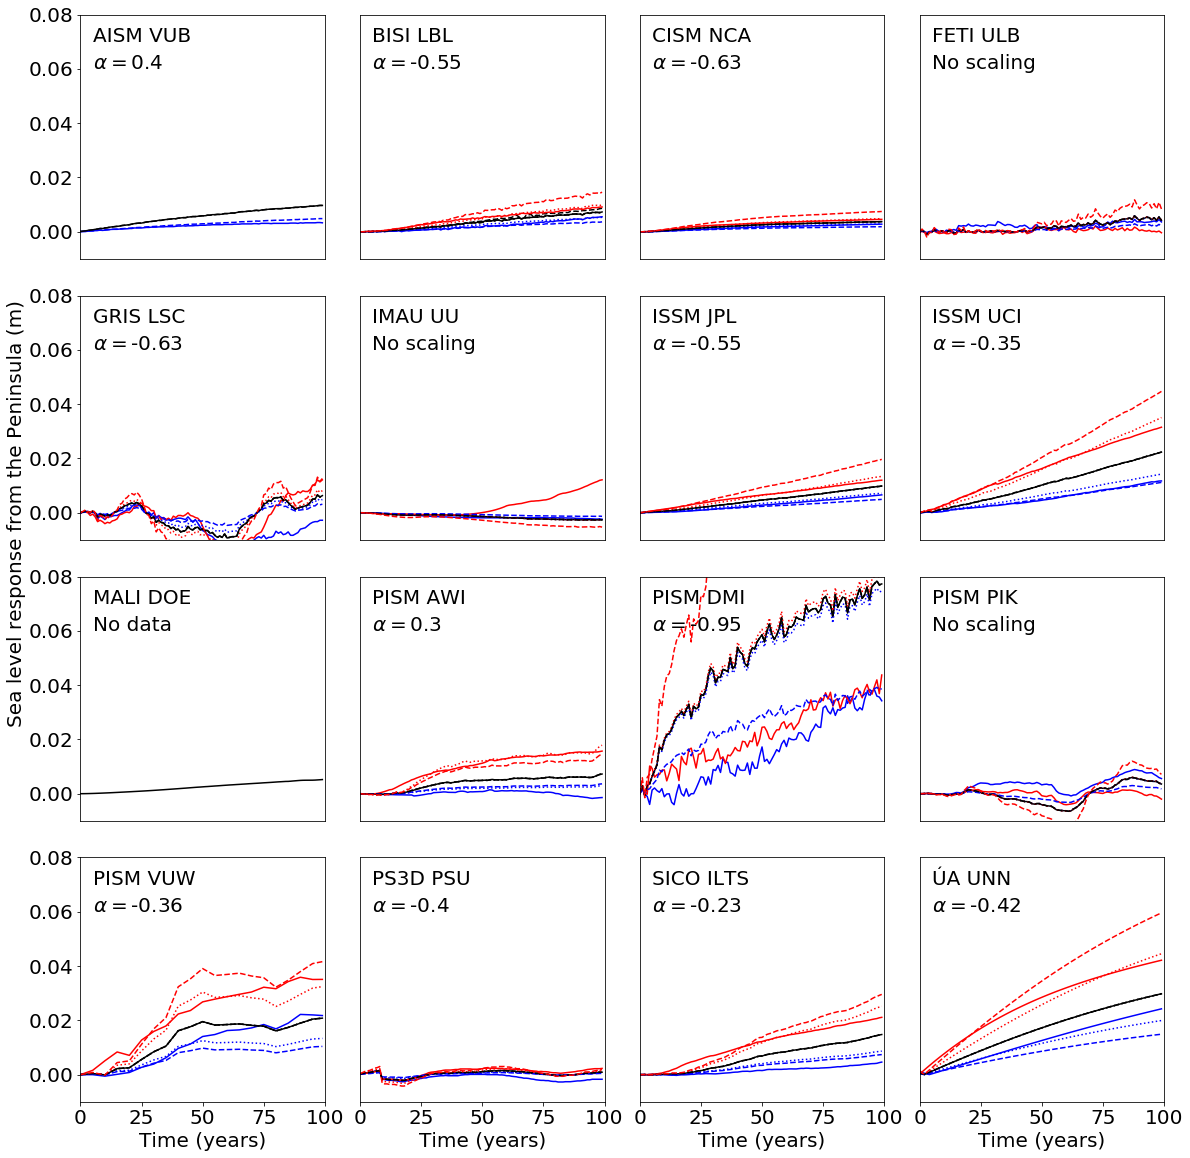

In [25]:
fp, axes = plt.subplots(4, 4,figsize=(figwidth,figwidth))
#fp.subplots_adjust(hspace=0.2, wspace=0.01)
fp.subplots_adjust(hspace=0.15, wspace=0.01)

# AISM_VUB

ax = axes[0,0]
#ax.plot(AISM_VUB_BM02_R5[:endyear],'g')
ax.plot(AISM_VUB_BM04_R5[:endyear],'b')
ax.plot(AISM_VUB_BM08_R5[:endyear],'k')

#ax.plot(AISM_VUB_BM02_R5_scaled[:endyear],':g')
#ax.plot(AISM_VUB_BM04_R5_scaled[:endyear],':b')
#ax.plot(AISM_VUB_BM08_R5_scaled[:endyear],':k')

#ax.plot(AISM_VUB_BM02_R5_scaled1[:endyear],'--g')
ax.plot(AISM_VUB_BM04_R5_scaled1[:endyear],'--b')
ax.plot(AISM_VUB_BM08_R5_scaled1[:endyear],'--k')

ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"AISM VUB",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_AISM_VUB_BM08_R5,2))
#ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# BISI_LBL

ax = axes[0,1]
ax.plot(BISI_LBL_BM08_500M_R5[:endyear],'--k')#,linewidth=5.0)

#ax.plot(BISI_LBL_BM02_R5[:endyear],'g')
ax.plot(BISI_LBL_BM04_R5[:endyear],'b')
ax.plot(BISI_LBL_BM08_R5[:endyear],'k')
ax.plot(BISI_LBL_BM16_R5[:endyear],'r')

#ax.plot(BISI_LBL_BM02_R5_scaled[:endyear],':g')
ax.plot(BISI_LBL_BM04_R5_scaled[:endyear],':b')
ax.plot(BISI_LBL_BM08_R5_scaled[:endyear],':k')
ax.plot(BISI_LBL_BM16_R5_scaled[:endyear],':r')

#ax.plot(BISI_LBL_BM02_R5_scaled1[:endyear],'--g')
ax.plot(BISI_LBL_BM04_R5_scaled1[:endyear],'--b')
ax.plot(BISI_LBL_BM08_R5_scaled1[:endyear],'--k')
ax.plot(BISI_LBL_BM16_R5_scaled1[:endyear],'--r')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"BISI LBL",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_BISI_LBL_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# CISM_NCA

ax = axes[0,2]

#ax.plot(CISM_NCA_BM01_R5[:endyear],'g')
#ax.plot(CISM_NCA_BM02_R5[:endyear],'g')
ax.plot(CISM_NCA_BM04_R5[:endyear],'b')
ax.plot(CISM_NCA_BM08_R5[:endyear],'k')
ax.plot(CISM_NCA_BM16_R5[:endyear],'r')
#ax.plot(CISM_NCA_BM32_R5[:endyear],'y')

#ax.plot(CISM_NCA_BM01_R5_scaled[:endyear],':g')
#ax.plot(CISM_NCA_BM02_R5_scaled[:endyear],':g')
ax.plot(CISM_NCA_BM04_R5_scaled[:endyear],':b')
ax.plot(CISM_NCA_BM08_R5_scaled[:endyear],':k')
ax.plot(CISM_NCA_BM16_R5_scaled[:endyear],':r')
#ax.plot(CISM_NCA_BM32_R5_scaled[:endyear],':y')

#ax.plot(CISM_NCA_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(CISM_NCA_BM02_R5_scaled1[:endyear],'--g')
ax.plot(CISM_NCA_BM04_R5_scaled1[:endyear],'--b')
ax.plot(CISM_NCA_BM08_R5_scaled1[:endyear],'--k')
ax.plot(CISM_NCA_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(CISM_NCA_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"CISM NCA",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_CISM_NCA_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# FETI_VUB
ax = axes[0,3]
#ax.plot(FETI_VUB_BM01_R5[:endyear],'g')
#ax.plot(FETI_VUB_BM02_R5[:endyear],'g')
ax.plot(FETI_VUB_BM04_R5[:endyear],'b')
ax.plot(FETI_VUB_BM08_R5[:endyear],'k')
ax.plot(FETI_VUB_BM16_R5[:endyear],'r')
#ax.plot(FETI_VUB_BM32_R5[:endyear],'y')

#ax.plot(FETI_VUB_BM01_R5_scaled[:endyear],':g')
#ax.plot(FETI_VUB_BM02_R5_scaled[:endyear],':g')
ax.plot(FETI_VUB_BM04_R5_scaled[:endyear],':b')
ax.plot(FETI_VUB_BM08_R5_scaled[:endyear],':k')
ax.plot(FETI_VUB_BM16_R5_scaled[:endyear],':r')
#ax.plot(FETI_VUB_BM32_R5_scaled[:endyear],':y')

#ax.plot(FETI_VUB_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(FETI_VUB_BM02_R5_scaled1[:endyear],'--g')
ax.plot(FETI_VUB_BM04_R5_scaled1[:endyear],'--b')
ax.plot(FETI_VUB_BM08_R5_scaled1[:endyear],'--k')
ax.plot(FETI_VUB_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(FETI_VUB_BM32_R5_scaled1[:endyear],'--y')


ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"FETI ULB",fontsize = SizeOfFont)
#ScalingText = r"$\alpha = $" + str(np.round(SF_FETI_VUB_BM08_R5,2))
ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R2,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# GRIS_LSC
ax = axes[1,0]
#ax.plot(GRIS_LSC_BM01_R5[:endyear],'g')
#ax.plot(GRIS_LSC_BM02_R5[:endyear],'g')
ax.plot(GRIS_LSC_BM04_R5[:endyear],'b')
ax.plot(GRIS_LSC_BM08_R5[:endyear],'k')
ax.plot(GRIS_LSC_BM16_R5[:endyear],'r')
#ax.plot(GRIS_LSC_BM32_R5[:endyear],'y')

#ax.plot(GRIS_LSC_BM01_R5_scaled[:endyear],':g')
#ax.plot(GRIS_LSC_BM02_R5_scaled[:endyear],':g')
ax.plot(GRIS_LSC_BM04_R5_scaled[:endyear],':b')
ax.plot(GRIS_LSC_BM08_R5_scaled[:endyear],':k')
ax.plot(GRIS_LSC_BM16_R5_scaled[:endyear],':r')
#ax.plot(GRIS_LSC_BM32_R5_scaled[:endyear],':y')

#ax.plot(GRIS_LSC_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(GRIS_LSC_BM02_R5_scaled1[:endyear],'--g')
ax.plot(GRIS_LSC_BM04_R5_scaled1[:endyear],'--b')
ax.plot(GRIS_LSC_BM08_R5_scaled1[:endyear],'--k')
ax.plot(GRIS_LSC_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(GRIS_LSC_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"GRIS LSC",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_GRIS_LSC_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R3,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# IMAU_VUB
ax = axes[1,1]
#ax.plot(IMAU_VUB_BM01_R5[:endyear],'g')
#ax.plot(IMAU_VUB_BM02_R5[:endyear],'g')
ax.plot(IMAU_VUB_BM04_R5[:endyear],'b')
ax.plot(IMAU_VUB_BM08_R5[:endyear],'k')
ax.plot(IMAU_VUB_BM16_R5[:endyear],'r')
#ax.plot(IMAU_VUB_BM32_R5[:endyear],'y')

#ax.plot(IMAU_VUB_BM01_R5_scaled[:endyear],':g')
#ax.plot(IMAU_VUB_BM02_R5_scaled[:endyear],':g')
ax.plot(IMAU_VUB_BM04_R5_scaled[:endyear],':b')
ax.plot(IMAU_VUB_BM08_R5_scaled[:endyear],':k')
ax.plot(IMAU_VUB_BM16_R5_scaled[:endyear],':r')
#ax.plot(IMAU_VUB_BM32_R5_scaled[:endyear],':y')

#ax.plot(IMAU_VUB_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(IMAU_VUB_BM02_R5_scaled1[:endyear],'--g')
ax.plot(IMAU_VUB_BM04_R5_scaled1[:endyear],'--b')
ax.plot(IMAU_VUB_BM08_R5_scaled1[:endyear],'--k')
ax.plot(IMAU_VUB_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(IMAU_VUB_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"IMAU UU",fontsize = SizeOfFont)
#ScalingText = r"$\alpha = $" + str(np.round(SF_IMAU_VUB_BM08_R5,2))
ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R4,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# ISSM_JPL
ax = axes[1,2]
#ax.plot(ISSM_JPL_BM01_R5[:endyear],'g')
#ax.plot(ISSM_JPL_BM02_R5[:endyear],'g')
ax.plot(ISSM_JPL_BM04_R5[:endyear],'b')
ax.plot(ISSM_JPL_BM08_R5[:endyear],'k')
ax.plot(ISSM_JPL_BM16_R5[:endyear],'r')
#ax.plot(ISSM_JPL_BM32_R5[:endyear],'y')

#ax.plot(ISSM_JPL_BM01_R5_scaled[:endyear],':g')
#ax.plot(ISSM_JPL_BM02_R5_scaled[:endyear],':g')
ax.plot(ISSM_JPL_BM04_R5_scaled[:endyear],':b')
ax.plot(ISSM_JPL_BM08_R5_scaled[:endyear],':k')
ax.plot(ISSM_JPL_BM16_R5_scaled[:endyear],':r')
#ax.plot(ISSM_JPL_BM32_R5_scaled[:endyear],':y')

#ax.plot(ISSM_JPL_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(ISSM_JPL_BM02_R5_scaled1[:endyear],'--g')
ax.plot(ISSM_JPL_BM04_R5_scaled1[:endyear],'--b')
ax.plot(ISSM_JPL_BM08_R5_scaled1[:endyear],'--k')
ax.plot(ISSM_JPL_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(ISSM_JPL_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"ISSM JPL",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_ISSM_JPL_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# ISSM_UCI
ax = axes[1,3]
#ax.plot(ISSM_UCI_BM01_R5[:endyear],'g')
#ax.plot(ISSM_UCI_BM02_R5[:endyear],'g')
ax.plot(ISSM_UCI_BM04_R5[:endyear],'b')
ax.plot(ISSM_UCI_BM08_R5[:endyear],'k')
ax.plot(ISSM_UCI_BM16_R5[:endyear],'r')
#ax.plot(ISSM_UCI_BM32_R5[:endyear],'y')

#ax.plot(ISSM_UCI_BM01_R5_scaled[:endyear],':g')
#ax.plot(ISSM_UCI_BM02_R5_scaled[:endyear],':g')
ax.plot(ISSM_UCI_BM04_R5_scaled[:endyear],':b')
ax.plot(ISSM_UCI_BM08_R5_scaled[:endyear],':k')
ax.plot(ISSM_UCI_BM16_R5_scaled[:endyear],':r')
#ax.plot(ISSM_UCI_BM32_R5_scaled[:endyear],':y')

#ax.plot(ISSM_UCI_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(ISSM_UCI_BM02_R5_scaled1[:endyear],'--g')
ax.plot(ISSM_UCI_BM04_R5_scaled1[:endyear],'--b')
ax.plot(ISSM_UCI_BM08_R5_scaled1[:endyear],'--k')
ax.plot(ISSM_UCI_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(ISSM_UCI_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
#ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("right")
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"ISSM UCI",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_ISSM_UCI_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R0,2))
#ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)


# MALI_LAN
ax = axes[2,0]
ax.plot(MALI_LAN_BM08_R5[:endyear],'k')

ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"MALI DOE",fontsize = SizeOfFont)
ScalingText = r"No data"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_AWI
ax = axes[2,1]
#ax.plot(PISM_AWI_BM01_R5[:endyear],'g')
#ax.plot(PISM_AWI_BM02_R5[:endyear],'g')
ax.plot(PISM_AWI_BM04_R5[:endyear],'b')
ax.plot(PISM_AWI_BM08_R5[:endyear],'k')
ax.plot(PISM_AWI_BM16_R5[:endyear],'r')
#ax.plot(PISM_AWI_BM32_R5[:endyear],'y')

#ax.plot(PISM_AWI_BM01_R5_scaled[:endyear],':g')
#ax.plot(PISM_AWI_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_AWI_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_AWI_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_AWI_BM16_R5_scaled[:endyear],':r')
#ax.plot(PISM_AWI_BM32_R5_scaled[:endyear],':y')

#ax.plot(PISM_AWI_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(PISM_AWI_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_AWI_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_AWI_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_AWI_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(PISM_AWI_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM AWI",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_AWI_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R4,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_DMI
ax = axes[2,2]
#ax.plot(PISM_DMI_BM01_R5[:endyear],'g')
#ax.plot(PISM_DMI_BM02_R5[:endyear],'g')
ax.plot(PISM_DMI_BM04_R5[:endyear],'b')
ax.plot(PISM_DMI_BM08_R5[:endyear],'k')
ax.plot(PISM_DMI_BM16_R5[:endyear],'r')
#ax.plot(PISM_DMI_BM32_R5[:endyear],'y')

#ax.plot(PISM_DMI_BM01_R5_scaled[:endyear],':g')
#ax.plot(PISM_DMI_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_DMI_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_DMI_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_DMI_BM16_R5_scaled[:endyear],':r')
#ax.plot(PISM_DMI_BM32_R5_scaled[:endyear],':y')

#ax.plot(PISM_DMI_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(PISM_DMI_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_DMI_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_DMI_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_DMI_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(PISM_DMI_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM DMI",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_DMI_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R4,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_PIK
ax = axes[2,3]
#ax.plot(PISM_PIK_BM01_R5[:endyear],'g')
#ax.plot(PISM_PIK_BM02_R5[:endyear],'g')
ax.plot(PISM_PIK_BM04_R5[:endyear],'b')
ax.plot(PISM_PIK_BM08_R5[:endyear],'k')
ax.plot(PISM_PIK_BM16_R5[:endyear],'r')
#ax.plot(PISM_PIK_BM32_R5[:endyear],'y')

#ax.plot(PISM_PIK_BM01_R5_scaled[:endyear],':g')
#ax.plot(PISM_PIK_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_PIK_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_PIK_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_PIK_BM16_R5_scaled[:endyear],':r')
#ax.plot(PISM_PIK_BM32_R5_scaled[:endyear],':y')

#ax.plot(PISM_PIK_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(PISM_PIK_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_PIK_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_PIK_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_PIK_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(PISM_PIK_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM PIK",fontsize = SizeOfFont)
#ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_PIK_BM08_R5,2))
ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_VUW
ax = axes[3,0]
#ax.plot(PISM_VUW_BM01_R5[:endyear],'g')
#ax.plot(PISM_VUW_BM02_R5[:endyear],'g')
ax.plot(PISM_VUW_BM04_R5[:endyear],'b')
ax.plot(PISM_VUW_BM08_R5[:endyear],'k')
ax.plot(PISM_VUW_BM16_R5[:endyear],'r')
#ax.plot(PISM_VUW_BM32_R5[:endyear],'y')

#ax.plot(PISM_VUW_BM01_R5_scaled[:endyear],':g')
#ax.plot(PISM_VUW_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_VUW_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_VUW_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_VUW_BM16_R5_scaled[:endyear],':r')
#ax.plot(PISM_VUW_BM32_R5_scaled[:endyear],':y')

#ax.plot(PISM_VUW_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(PISM_VUW_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_VUW_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_VUW_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_VUW_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(PISM_VUW_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
#ax.yaxis.set_label_position("right")
#ax.yaxis.set_ticks_position("right")
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM VUW",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_VUW_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.text(XlabelXPos, XlabelYPos,"Sea level response from the Peninsula (m)",fontsize = SizeOfFont, rotation = 90)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R0,2))
#ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)

# PS3D_PSU
ax = axes[3,1]
#ax.plot(PS3D_PSU_BM01_R5[:endyear],'g')
#ax.plot(PS3D_PSU_BM02_R5[:endyear],'g')
ax.plot(PS3D_PSU_BM04_R5[:endyear],'b')
ax.plot(PS3D_PSU_BM08_R5[:endyear],'k')
ax.plot(PS3D_PSU_BM16_R5[:endyear],'r')
#ax.plot(PS3D_PSU_BM32_R5[:endyear],'y')

#ax.plot(PS3D_PSU_BM01_R5_scaled[:endyear],':g')
#ax.plot(PS3D_PSU_BM02_R5_scaled[:endyear],':g')
ax.plot(PS3D_PSU_BM04_R5_scaled[:endyear],':b')
ax.plot(PS3D_PSU_BM08_R5_scaled[:endyear],':k')
ax.plot(PS3D_PSU_BM16_R5_scaled[:endyear],':r')
#ax.plot(PS3D_PSU_BM32_R5_scaled[:endyear],':y')

#ax.plot(PS3D_PSU_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(PS3D_PSU_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PS3D_PSU_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PS3D_PSU_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PS3D_PSU_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(PS3D_PSU_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PS3D PSU",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PS3D_PSU_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R4,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)
#ax.xaxis.set_ticks(np.arange(0, 101, 50))


# SICO_UHO
ax = axes[3,2]
#ax.plot(SICO_UHO_BM01_R5[:endyear],'g')
#ax.plot(SICO_UHO_BM02_R5[:endyear],'g')
ax.plot(SICO_UHO_BM04_R5[:endyear],'b')
ax.plot(SICO_UHO_BM08_R5[:endyear],'k')
ax.plot(SICO_UHO_BM16_R5[:endyear],'r')
#ax.plot(SICO_UHO_BM32_R5[:endyear],'y')

#ax.plot(SICO_UHO_BM01_R5_scaled[:endyear],':g')
#ax.plot(SICO_UHO_BM02_R5_scaled[:endyear],':g')
ax.plot(SICO_UHO_BM04_R5_scaled[:endyear],':b')
ax.plot(SICO_UHO_BM08_R5_scaled[:endyear],':k')
ax.plot(SICO_UHO_BM16_R5_scaled[:endyear],':r')
#ax.plot(SICO_UHO_BM32_R5_scaled[:endyear],':y')

#ax.plot(SICO_UHO_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(SICO_UHO_BM02_R5_scaled1[:endyear],'--g')
ax.plot(SICO_UHO_BM04_R5_scaled1[:endyear],'--b')
ax.plot(SICO_UHO_BM08_R5_scaled1[:endyear],'--k')
ax.plot(SICO_UHO_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(SICO_UHO_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"SICO ILTS",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_SICO_UHO_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ax.xaxis.set_ticks(np.arange(0, 101, 50))
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# UA_UNN
ax = axes[3,3]
#ax.plot(UA_UNN_BM01_R5[:endyear],'g')
#ax.plot(UA_UNN_BM02_R5[:endyear],'g')
ax.plot(UA_UNN_BM04_R5[:endyear],'b')
ax.plot(UA_UNN_BM08_R5[:endyear],'k')
ax.plot(UA_UNN_BM16_R5[:endyear],'r')
#ax.plot(UA_UNN_BM32_R5[:endyear],'y')

#ax.plot(UA_UNN_BM01_R5_scaled[:endyear],':g')
#ax.plot(UA_UNN_BM02_R5_scaled[:endyear],':g')
ax.plot(UA_UNN_BM04_R5_scaled[:endyear],':b')
ax.plot(UA_UNN_BM08_R5_scaled[:endyear],':k')
ax.plot(UA_UNN_BM16_R5_scaled[:endyear],':r')
#ax.plot(UA_UNN_BM32_R5_scaled[:endyear],':y')

#ax.plot(UA_UNN_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(UA_UNN_BM02_R5_scaled1[:endyear],'--g')
ax.plot(UA_UNN_BM04_R5_scaled1[:endyear],'--b')
ax.plot(UA_UNN_BM08_R5_scaled1[:endyear],'--k')
ax.plot(UA_UNN_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(UA_UNN_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("right")
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"ÚA UNN",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_UA_UNN_BM08_R5,2))
#ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ax.xaxis.set_ticks(np.arange(0, 101, 50))
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R0,2))
#ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)


fp.savefig("Figures/Linearity_Peninsula.pdf", bbox_inches='tight')

In [26]:
# Set plotting variables
SizeOfFont = 20

# For all panels but Whole Antarctica
xmin = 0
xmax = 200
ymin = -0.01
ymax = 0.12
xlimit = [xmin, xmax]
ylimit = [ymin, ymax]
AspectRatio = 1.0*((xmax-xmin)/(ymax-ymin))


figwidth = 20

ScalingTextXPos= xmin+10
ScalingTextYPos= ymax-0.015
ScalingTextXPos2= xmin+10
ScalingTextYPos2= ymax-0.03

XlabelXPos = xmin-70
XlabelYPos = ymax+0.2

endyear = 200

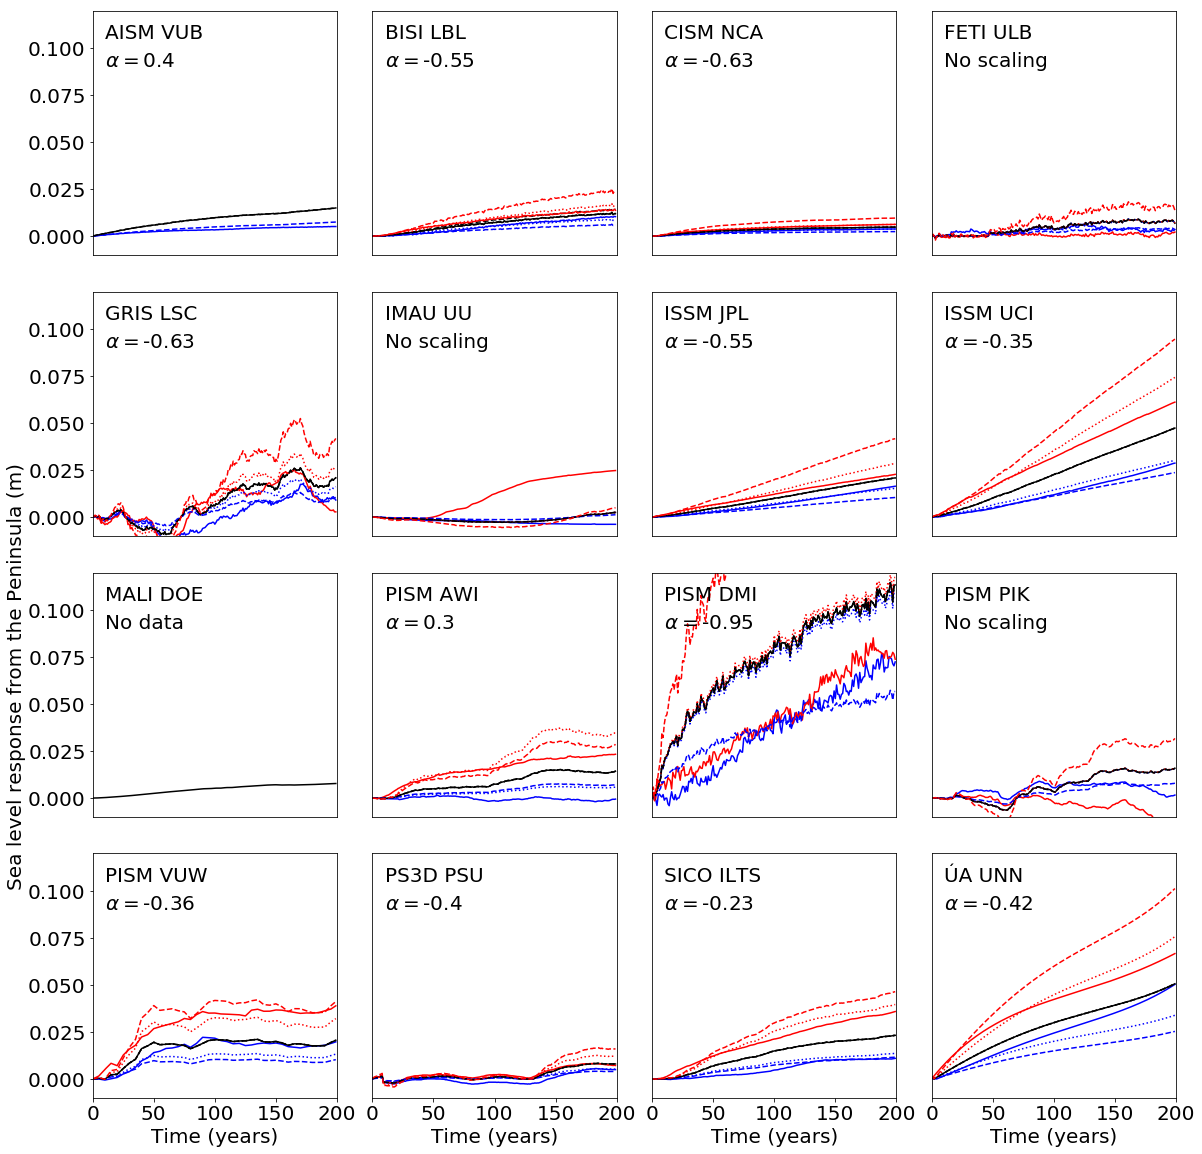

In [27]:
fp, axes = plt.subplots(4, 4,figsize=(figwidth,figwidth))
#fp.subplots_adjust(hspace=0.2, wspace=0.01)
fp.subplots_adjust(hspace=0.15, wspace=0.01)

# AISM_VUB

ax = axes[0,0]
#ax.plot(AISM_VUB_BM02_R5[:endyear],'g')
ax.plot(AISM_VUB_BM04_R5[:endyear],'b')
ax.plot(AISM_VUB_BM08_R5[:endyear],'k')

#ax.plot(AISM_VUB_BM02_R5_scaled[:endyear],':g')
#ax.plot(AISM_VUB_BM04_R5_scaled[:endyear],':b')
#ax.plot(AISM_VUB_BM08_R5_scaled[:endyear],':k')

#ax.plot(AISM_VUB_BM02_R5_scaled1[:endyear],'--g')
ax.plot(AISM_VUB_BM04_R5_scaled1[:endyear],'--b')
ax.plot(AISM_VUB_BM08_R5_scaled1[:endyear],'--k')

ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"AISM VUB",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_AISM_VUB_BM08_R5,2))
#ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# BISI_LBL

ax = axes[0,1]
ax.plot(BISI_LBL_BM08_500M_R5[:endyear],'--k')#,linewidth=5.0)

#ax.plot(BISI_LBL_BM02_R5[:endyear],'g')
ax.plot(BISI_LBL_BM04_R5[:endyear],'b')
ax.plot(BISI_LBL_BM08_R5[:endyear],'k')
ax.plot(BISI_LBL_BM16_R5[:endyear],'r')

#ax.plot(BISI_LBL_BM02_R5_scaled[:endyear],':g')
ax.plot(BISI_LBL_BM04_R5_scaled[:endyear],':b')
ax.plot(BISI_LBL_BM08_R5_scaled[:endyear],':k')
ax.plot(BISI_LBL_BM16_R5_scaled[:endyear],':r')

#ax.plot(BISI_LBL_BM02_R5_scaled1[:endyear],'--g')
ax.plot(BISI_LBL_BM04_R5_scaled1[:endyear],'--b')
ax.plot(BISI_LBL_BM08_R5_scaled1[:endyear],'--k')
ax.plot(BISI_LBL_BM16_R5_scaled1[:endyear],'--r')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"BISI LBL",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_BISI_LBL_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# CISM_NCA

ax = axes[0,2]

#ax.plot(CISM_NCA_BM01_R5[:endyear],'g')
#ax.plot(CISM_NCA_BM02_R5[:endyear],'g')
ax.plot(CISM_NCA_BM04_R5[:endyear],'b')
ax.plot(CISM_NCA_BM08_R5[:endyear],'k')
ax.plot(CISM_NCA_BM16_R5[:endyear],'r')
#ax.plot(CISM_NCA_BM32_R5[:endyear],'y')

#ax.plot(CISM_NCA_BM01_R5_scaled[:endyear],':g')
#ax.plot(CISM_NCA_BM02_R5_scaled[:endyear],':g')
ax.plot(CISM_NCA_BM04_R5_scaled[:endyear],':b')
ax.plot(CISM_NCA_BM08_R5_scaled[:endyear],':k')
ax.plot(CISM_NCA_BM16_R5_scaled[:endyear],':r')
#ax.plot(CISM_NCA_BM32_R5_scaled[:endyear],':y')

#ax.plot(CISM_NCA_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(CISM_NCA_BM02_R5_scaled1[:endyear],'--g')
ax.plot(CISM_NCA_BM04_R5_scaled1[:endyear],'--b')
ax.plot(CISM_NCA_BM08_R5_scaled1[:endyear],'--k')
ax.plot(CISM_NCA_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(CISM_NCA_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"CISM NCA",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_CISM_NCA_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# FETI_VUB
ax = axes[0,3]
#ax.plot(FETI_VUB_BM01_R5[:endyear],'g')
#ax.plot(FETI_VUB_BM02_R5[:endyear],'g')
ax.plot(FETI_VUB_BM04_R5[:endyear],'b')
ax.plot(FETI_VUB_BM08_R5[:endyear],'k')
ax.plot(FETI_VUB_BM16_R5[:endyear],'r')
#ax.plot(FETI_VUB_BM32_R5[:endyear],'y')

#ax.plot(FETI_VUB_BM01_R5_scaled[:endyear],':g')
#ax.plot(FETI_VUB_BM02_R5_scaled[:endyear],':g')
ax.plot(FETI_VUB_BM04_R5_scaled[:endyear],':b')
ax.plot(FETI_VUB_BM08_R5_scaled[:endyear],':k')
ax.plot(FETI_VUB_BM16_R5_scaled[:endyear],':r')
#ax.plot(FETI_VUB_BM32_R5_scaled[:endyear],':y')

#ax.plot(FETI_VUB_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(FETI_VUB_BM02_R5_scaled1[:endyear],'--g')
ax.plot(FETI_VUB_BM04_R5_scaled1[:endyear],'--b')
ax.plot(FETI_VUB_BM08_R5_scaled1[:endyear],'--k')
ax.plot(FETI_VUB_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(FETI_VUB_BM32_R5_scaled1[:endyear],'--y')


ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"FETI ULB",fontsize = SizeOfFont)
#ScalingText = r"$\alpha = $" + str(np.round(SF_FETI_VUB_BM08_R5,2))
ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R2,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# GRIS_LSC
ax = axes[1,0]
#ax.plot(GRIS_LSC_BM01_R5[:endyear],'g')
#ax.plot(GRIS_LSC_BM02_R5[:endyear],'g')
ax.plot(GRIS_LSC_BM04_R5[:endyear],'b')
ax.plot(GRIS_LSC_BM08_R5[:endyear],'k')
ax.plot(GRIS_LSC_BM16_R5[:endyear],'r')
#ax.plot(GRIS_LSC_BM32_R5[:endyear],'y')

#ax.plot(GRIS_LSC_BM01_R5_scaled[:endyear],':g')
#ax.plot(GRIS_LSC_BM02_R5_scaled[:endyear],':g')
ax.plot(GRIS_LSC_BM04_R5_scaled[:endyear],':b')
ax.plot(GRIS_LSC_BM08_R5_scaled[:endyear],':k')
ax.plot(GRIS_LSC_BM16_R5_scaled[:endyear],':r')
#ax.plot(GRIS_LSC_BM32_R5_scaled[:endyear],':y')

#ax.plot(GRIS_LSC_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(GRIS_LSC_BM02_R5_scaled1[:endyear],'--g')
ax.plot(GRIS_LSC_BM04_R5_scaled1[:endyear],'--b')
ax.plot(GRIS_LSC_BM08_R5_scaled1[:endyear],'--k')
ax.plot(GRIS_LSC_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(GRIS_LSC_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"GRIS LSC",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_GRIS_LSC_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R3,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# IMAU_VUB
ax = axes[1,1]
#ax.plot(IMAU_VUB_BM01_R5[:endyear],'g')
#ax.plot(IMAU_VUB_BM02_R5[:endyear],'g')
ax.plot(IMAU_VUB_BM04_R5[:endyear],'b')
ax.plot(IMAU_VUB_BM08_R5[:endyear],'k')
ax.plot(IMAU_VUB_BM16_R5[:endyear],'r')
#ax.plot(IMAU_VUB_BM32_R5[:endyear],'y')

#ax.plot(IMAU_VUB_BM01_R5_scaled[:endyear],':g')
#ax.plot(IMAU_VUB_BM02_R5_scaled[:endyear],':g')
ax.plot(IMAU_VUB_BM04_R5_scaled[:endyear],':b')
ax.plot(IMAU_VUB_BM08_R5_scaled[:endyear],':k')
ax.plot(IMAU_VUB_BM16_R5_scaled[:endyear],':r')
#ax.plot(IMAU_VUB_BM32_R5_scaled[:endyear],':y')

#ax.plot(IMAU_VUB_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(IMAU_VUB_BM02_R5_scaled1[:endyear],'--g')
ax.plot(IMAU_VUB_BM04_R5_scaled1[:endyear],'--b')
ax.plot(IMAU_VUB_BM08_R5_scaled1[:endyear],'--k')
ax.plot(IMAU_VUB_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(IMAU_VUB_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"IMAU UU",fontsize = SizeOfFont)
#ScalingText = r"$\alpha = $" + str(np.round(SF_IMAU_VUB_BM08_R5,2))
ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R4,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# ISSM_JPL
ax = axes[1,2]
#ax.plot(ISSM_JPL_BM01_R5[:endyear],'g')
#ax.plot(ISSM_JPL_BM02_R5[:endyear],'g')
ax.plot(ISSM_JPL_BM04_R5[:endyear],'b')
ax.plot(ISSM_JPL_BM08_R5[:endyear],'k')
ax.plot(ISSM_JPL_BM16_R5[:endyear],'r')
#ax.plot(ISSM_JPL_BM32_R5[:endyear],'y')

#ax.plot(ISSM_JPL_BM01_R5_scaled[:endyear],':g')
#ax.plot(ISSM_JPL_BM02_R5_scaled[:endyear],':g')
ax.plot(ISSM_JPL_BM04_R5_scaled[:endyear],':b')
ax.plot(ISSM_JPL_BM08_R5_scaled[:endyear],':k')
ax.plot(ISSM_JPL_BM16_R5_scaled[:endyear],':r')
#ax.plot(ISSM_JPL_BM32_R5_scaled[:endyear],':y')

#ax.plot(ISSM_JPL_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(ISSM_JPL_BM02_R5_scaled1[:endyear],'--g')
ax.plot(ISSM_JPL_BM04_R5_scaled1[:endyear],'--b')
ax.plot(ISSM_JPL_BM08_R5_scaled1[:endyear],'--k')
ax.plot(ISSM_JPL_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(ISSM_JPL_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"ISSM JPL",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_ISSM_JPL_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# ISSM_UCI
ax = axes[1,3]
#ax.plot(ISSM_UCI_BM01_R5[:endyear],'g')
#ax.plot(ISSM_UCI_BM02_R5[:endyear],'g')
ax.plot(ISSM_UCI_BM04_R5[:endyear],'b')
ax.plot(ISSM_UCI_BM08_R5[:endyear],'k')
ax.plot(ISSM_UCI_BM16_R5[:endyear],'r')
#ax.plot(ISSM_UCI_BM32_R5[:endyear],'y')

#ax.plot(ISSM_UCI_BM01_R5_scaled[:endyear],':g')
#ax.plot(ISSM_UCI_BM02_R5_scaled[:endyear],':g')
ax.plot(ISSM_UCI_BM04_R5_scaled[:endyear],':b')
ax.plot(ISSM_UCI_BM08_R5_scaled[:endyear],':k')
ax.plot(ISSM_UCI_BM16_R5_scaled[:endyear],':r')
#ax.plot(ISSM_UCI_BM32_R5_scaled[:endyear],':y')

#ax.plot(ISSM_UCI_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(ISSM_UCI_BM02_R5_scaled1[:endyear],'--g')
ax.plot(ISSM_UCI_BM04_R5_scaled1[:endyear],'--b')
ax.plot(ISSM_UCI_BM08_R5_scaled1[:endyear],'--k')
ax.plot(ISSM_UCI_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(ISSM_UCI_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
#ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("right")
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"ISSM UCI",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_ISSM_UCI_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R0,2))
#ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)


# MALI_LAN
ax = axes[2,0]
ax.plot(MALI_LAN_BM08_R5[:endyear],'k')

ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"MALI DOE",fontsize = SizeOfFont)
ScalingText = r"No data"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_AWI
ax = axes[2,1]
#ax.plot(PISM_AWI_BM01_R5[:endyear],'g')
#ax.plot(PISM_AWI_BM02_R5[:endyear],'g')
ax.plot(PISM_AWI_BM04_R5[:endyear],'b')
ax.plot(PISM_AWI_BM08_R5[:endyear],'k')
ax.plot(PISM_AWI_BM16_R5[:endyear],'r')
#ax.plot(PISM_AWI_BM32_R5[:endyear],'y')

#ax.plot(PISM_AWI_BM01_R5_scaled[:endyear],':g')
#ax.plot(PISM_AWI_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_AWI_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_AWI_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_AWI_BM16_R5_scaled[:endyear],':r')
#ax.plot(PISM_AWI_BM32_R5_scaled[:endyear],':y')

#ax.plot(PISM_AWI_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(PISM_AWI_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_AWI_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_AWI_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_AWI_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(PISM_AWI_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM AWI",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_AWI_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R4,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_DMI
ax = axes[2,2]
#ax.plot(PISM_DMI_BM01_R5[:endyear],'g')
#ax.plot(PISM_DMI_BM02_R5[:endyear],'g')
ax.plot(PISM_DMI_BM04_R5[:endyear],'b')
ax.plot(PISM_DMI_BM08_R5[:endyear],'k')
ax.plot(PISM_DMI_BM16_R5[:endyear],'r')
#ax.plot(PISM_DMI_BM32_R5[:endyear],'y')

#ax.plot(PISM_DMI_BM01_R5_scaled[:endyear],':g')
#ax.plot(PISM_DMI_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_DMI_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_DMI_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_DMI_BM16_R5_scaled[:endyear],':r')
#ax.plot(PISM_DMI_BM32_R5_scaled[:endyear],':y')

#ax.plot(PISM_DMI_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(PISM_DMI_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_DMI_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_DMI_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_DMI_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(PISM_DMI_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM DMI",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_DMI_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R4,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_PIK
ax = axes[2,3]
#ax.plot(PISM_PIK_BM01_R5[:endyear],'g')
#ax.plot(PISM_PIK_BM02_R5[:endyear],'g')
ax.plot(PISM_PIK_BM04_R5[:endyear],'b')
ax.plot(PISM_PIK_BM08_R5[:endyear],'k')
ax.plot(PISM_PIK_BM16_R5[:endyear],'r')
#ax.plot(PISM_PIK_BM32_R5[:endyear],'y')

#ax.plot(PISM_PIK_BM01_R5_scaled[:endyear],':g')
#ax.plot(PISM_PIK_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_PIK_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_PIK_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_PIK_BM16_R5_scaled[:endyear],':r')
#ax.plot(PISM_PIK_BM32_R5_scaled[:endyear],':y')

#ax.plot(PISM_PIK_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(PISM_PIK_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_PIK_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_PIK_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_PIK_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(PISM_PIK_BM32_R5_scaled1[:endyear],'--y')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM PIK",fontsize = SizeOfFont)
#ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_PIK_BM08_R5,2))
ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
#ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# PISM_VUW
ax = axes[3,0]
#ax.plot(PISM_VUW_BM01_R5[:endyear],'g')
#ax.plot(PISM_VUW_BM02_R5[:endyear],'g')
ax.plot(PISM_VUW_BM04_R5[:endyear],'b')
ax.plot(PISM_VUW_BM08_R5[:endyear],'k')
ax.plot(PISM_VUW_BM16_R5[:endyear],'r')
#ax.plot(PISM_VUW_BM32_R5[:endyear],'y')

#ax.plot(PISM_VUW_BM01_R5_scaled[:endyear],':g')
#ax.plot(PISM_VUW_BM02_R5_scaled[:endyear],':g')
ax.plot(PISM_VUW_BM04_R5_scaled[:endyear],':b')
ax.plot(PISM_VUW_BM08_R5_scaled[:endyear],':k')
ax.plot(PISM_VUW_BM16_R5_scaled[:endyear],':r')
#ax.plot(PISM_VUW_BM32_R5_scaled[:endyear],':y')

#ax.plot(PISM_VUW_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(PISM_VUW_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PISM_VUW_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PISM_VUW_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PISM_VUW_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(PISM_VUW_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
#ax.yaxis.set_visible(False)
#ax.yaxis.set_label_position("right")
#ax.yaxis.set_ticks_position("right")
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PISM VUW",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PISM_VUW_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.text(XlabelXPos, XlabelYPos,"Sea level response from the Peninsula (m)",fontsize = SizeOfFont, rotation = 90)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R0,2))
#ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)

# PS3D_PSU
ax = axes[3,1]
#ax.plot(PS3D_PSU_BM01_R5[:endyear],'g')
#ax.plot(PS3D_PSU_BM02_R5[:endyear],'g')
ax.plot(PS3D_PSU_BM04_R5[:endyear],'b')
ax.plot(PS3D_PSU_BM08_R5[:endyear],'k')
ax.plot(PS3D_PSU_BM16_R5[:endyear],'r')
#ax.plot(PS3D_PSU_BM32_R5[:endyear],'y')

#ax.plot(PS3D_PSU_BM01_R5_scaled[:endyear],':g')
#ax.plot(PS3D_PSU_BM02_R5_scaled[:endyear],':g')
ax.plot(PS3D_PSU_BM04_R5_scaled[:endyear],':b')
ax.plot(PS3D_PSU_BM08_R5_scaled[:endyear],':k')
ax.plot(PS3D_PSU_BM16_R5_scaled[:endyear],':r')
#ax.plot(PS3D_PSU_BM32_R5_scaled[:endyear],':y')

#ax.plot(PS3D_PSU_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(PS3D_PSU_BM02_R5_scaled1[:endyear],'--g')
ax.plot(PS3D_PSU_BM04_R5_scaled1[:endyear],'--b')
ax.plot(PS3D_PSU_BM08_R5_scaled1[:endyear],'--k')
ax.plot(PS3D_PSU_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(PS3D_PSU_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"PS3D PSU",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_PS3D_PSU_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R4,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)
#ax.xaxis.set_ticks(np.arange(0, 101, 50))


# SICO_UHO
ax = axes[3,2]
#ax.plot(SICO_UHO_BM01_R5[:endyear],'g')
#ax.plot(SICO_UHO_BM02_R5[:endyear],'g')
ax.plot(SICO_UHO_BM04_R5[:endyear],'b')
ax.plot(SICO_UHO_BM08_R5[:endyear],'k')
ax.plot(SICO_UHO_BM16_R5[:endyear],'r')
#ax.plot(SICO_UHO_BM32_R5[:endyear],'y')

#ax.plot(SICO_UHO_BM01_R5_scaled[:endyear],':g')
#ax.plot(SICO_UHO_BM02_R5_scaled[:endyear],':g')
ax.plot(SICO_UHO_BM04_R5_scaled[:endyear],':b')
ax.plot(SICO_UHO_BM08_R5_scaled[:endyear],':k')
ax.plot(SICO_UHO_BM16_R5_scaled[:endyear],':r')
#ax.plot(SICO_UHO_BM32_R5_scaled[:endyear],':y')

#ax.plot(SICO_UHO_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(SICO_UHO_BM02_R5_scaled1[:endyear],'--g')
ax.plot(SICO_UHO_BM04_R5_scaled1[:endyear],'--b')
ax.plot(SICO_UHO_BM08_R5_scaled1[:endyear],'--k')
ax.plot(SICO_UHO_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(SICO_UHO_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"SICO ILTS",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_SICO_UHO_BM08_R5,2))
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
#ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ax.xaxis.set_ticks(np.arange(0, 101, 50))
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R5,2))
#ax.text(ScalingTextXPos,ScalingTextYPos,ScalingText,fontsize = SizeOfFont)


# UA_UNN
ax = axes[3,3]
#ax.plot(UA_UNN_BM01_R5[:endyear],'g')
#ax.plot(UA_UNN_BM02_R5[:endyear],'g')
ax.plot(UA_UNN_BM04_R5[:endyear],'b')
ax.plot(UA_UNN_BM08_R5[:endyear],'k')
ax.plot(UA_UNN_BM16_R5[:endyear],'r')
#ax.plot(UA_UNN_BM32_R5[:endyear],'y')

#ax.plot(UA_UNN_BM01_R5_scaled[:endyear],':g')
#ax.plot(UA_UNN_BM02_R5_scaled[:endyear],':g')
ax.plot(UA_UNN_BM04_R5_scaled[:endyear],':b')
ax.plot(UA_UNN_BM08_R5_scaled[:endyear],':k')
ax.plot(UA_UNN_BM16_R5_scaled[:endyear],':r')
#ax.plot(UA_UNN_BM32_R5_scaled[:endyear],':y')

#ax.plot(UA_UNN_BM01_R5_scaled1[:endyear],'--g')
#ax.plot(UA_UNN_BM02_R5_scaled1[:endyear],'--g')
ax.plot(UA_UNN_BM04_R5_scaled1[:endyear],'--b')
ax.plot(UA_UNN_BM08_R5_scaled1[:endyear],'--k')
ax.plot(UA_UNN_BM16_R5_scaled1[:endyear],'--r')
#ax.plot(UA_UNN_BM32_R5_scaled1[:endyear],'--y')

#ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("right")
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.xaxis.set_tick_params(labelsize=SizeOfFont)
ax.yaxis.set_tick_params(labelsize=SizeOfFont)
ax.set(adjustable='box',aspect=AspectRatio)
ax.text(ScalingTextXPos,ScalingTextYPos,"ÚA UNN",fontsize = SizeOfFont)
ScalingText = r"$\alpha = $" + str(np.round(SF_UA_UNN_BM08_R5,2))
#ScalingText = r"No scaling"
ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)
ax.set_ylabel("Sea level response (m)",fontsize = SizeOfFont)
ax.set_xlabel("Time (years)",fontsize = SizeOfFont)
#ax.xaxis.set_ticks(np.arange(0, 101, 50))
#ScalingText = "r = " + str(np.round(SF_ISSM_UCI_BM08_R0,2))
#ax.text(ScalingTextXPos2,ScalingTextYPos2,ScalingText,fontsize = SizeOfFont)


fp.savefig("Figures/Linearity_Peninsula_200yrs.pdf", bbox_inches='tight')